In [1]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np
import time
import datetime

In [3]:
# 음수 표현
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기

In [4]:
df = pd.read_csv('../04_가스_기온_합치기/2013-2018년_가스공급량_기온_습도_기압01.csv')
df.head()

,연월일,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
0,2013-01-01,2013,1,1,1,1,0,2497.129,-8.5,57.0,1010.0
1,2013-01-01,2013,1,1,1,1,1,2169.093,-8.5,57.0,1010.0
2,2013-01-01,2013,1,1,1,1,2,226.178,-8.5,57.0,1010.0
3,2013-01-01,2013,1,1,1,1,3,1434.516,-8.5,57.0,1010.0
4,2013-01-01,2013,1,1,1,1,4,3272.837,-8.5,57.0,1010.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   연월일      368088 non-null  object 
 1   year     368088 non-null  int64  
 2   month    368088 non-null  int64  
 3   day      368088 non-null  int64  
 4   weekday  368088 non-null  int64  
 5   시간       368088 non-null  int64  
 6   구분       368088 non-null  int64  
 7   공급량      368088 non-null  float64
 8   기온       368088 non-null  float64
 9   습도       368088 non-null  float64
 10  기압       368088 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 30.9+ MB


# 데이터를 구분별로 나누기

In [6]:
df0 = df[df['구분']==0].reset_index(drop=True)
df1 = df[df['구분']==1].reset_index(drop=True)
df2 = df[df['구분']==2].reset_index(drop=True)
df3 = df[df['구분']==3].reset_index(drop=True)
df4 = df[df['구분']==4].reset_index(drop=True)
df5 = df[df['구분']==5].reset_index(drop=True)
df6 = df[df['구분']==6].reset_index(drop=True)

# 구분별 describe

In [7]:
df.describe()

,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
count,368088.000000,368088.000000,368088.000000,368088.000000,368088.000000,368088.000000,368088.000000,368088.000000,368088.000000,368088.000000
mean,2015.500228,6.523962,15.726609,3.000000,12.500000,3.000000,948.100037,13.202699,59.516051,1006.104014
std,1.707471,3.448424,8.798824,2.000003,6.922196,2.000003,927.211578,11.267038,19.930866,8.067015
min,2013.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.378000,-18.000000,7.000000,976.500000
25%,2014.000000,4.000000,8.000000,1.000000,6.750000,1.000000,221.973000,3.700000,44.000000,999.700000
50%,2016.000000,7.000000,16.000000,3.000000,12.500000,3.000000,637.014000,14.300000,59.000000,1006.300000
75%,2017.000000,10.000000,23.000000,5.000000,18.250000,5.000000,1398.919000,22.900000,75.000000,1012.400000
max,2018.000000,12.000000,31.000000,6.000000,24.000000,6.000000,11593.617000,39.400000,100.000000,1028.300000


In [8]:
df1.describe()

,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.0,52584.000000,52584.000000,52584.000000,52584.000000
mean,2015.500228,6.523962,15.726609,3.000000,12.500000,1.0,958.564621,13.202699,59.516051,1006.104014
std,1.707485,3.448452,8.798896,2.000019,6.922252,0.0,674.199480,11.267130,19.931029,8.067080
min,2013.000000,1.000000,1.000000,0.000000,1.000000,1.0,67.973000,-18.000000,7.000000,976.500000
25%,2014.000000,4.000000,8.000000,1.000000,6.750000,1.0,469.506500,3.700000,44.000000,999.700000
50%,2016.000000,7.000000,16.000000,3.000000,12.500000,1.0,676.933000,14.300000,59.000000,1006.300000
75%,2017.000000,10.000000,23.000000,5.000000,18.250000,1.0,1441.473000,22.900000,75.000000,1012.400000
max,2018.000000,12.000000,31.000000,6.000000,24.000000,1.0,3798.613000,39.400000,100.000000,1028.300000


In [9]:
df2.describe()

,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.0,52584.000000,52584.000000,52584.000000,52584.000000
mean,2015.500228,6.523962,15.726609,3.000000,12.500000,2.0,131.585481,13.202699,59.516051,1006.104014
std,1.707485,3.448452,8.798896,2.000019,6.922252,0.0,59.177756,11.267130,19.931029,8.067080
min,2013.000000,1.000000,1.000000,0.000000,1.000000,2.0,1.378000,-18.000000,7.000000,976.500000
25%,2014.000000,4.000000,8.000000,1.000000,6.750000,2.0,94.978000,3.700000,44.000000,999.700000
50%,2016.000000,7.000000,16.000000,3.000000,12.500000,2.0,120.578000,14.300000,59.000000,1006.300000
75%,2017.000000,10.000000,23.000000,5.000000,18.250000,2.0,171.778000,22.900000,75.000000,1012.400000
max,2018.000000,12.000000,31.000000,6.000000,24.000000,2.0,358.654000,39.400000,100.000000,1028.300000


In [10]:
df3.describe()

,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.0,52584.000000,52584.000000,52584.000000,52584.000000
mean,2015.500228,6.523962,15.726609,3.000000,12.500000,3.0,664.626452,13.202699,59.516051,1006.104014
std,1.707485,3.448452,8.798896,2.000019,6.922252,0.0,446.630583,11.267130,19.931029,8.067080
min,2013.000000,1.000000,1.000000,0.000000,1.000000,3.0,36.196000,-18.000000,7.000000,976.500000
25%,2014.000000,4.000000,8.000000,1.000000,6.750000,3.0,326.131000,3.700000,44.000000,999.700000
50%,2016.000000,7.000000,16.000000,3.000000,12.500000,3.0,492.515000,14.300000,59.000000,1006.300000
75%,2017.000000,10.000000,23.000000,5.000000,18.250000,3.0,996.105000,22.900000,75.000000,1012.400000
max,2018.000000,12.000000,31.000000,6.000000,24.000000,3.0,2377.584000,39.400000,100.000000,1028.300000


In [11]:
df4.describe()

,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.0,52584.000000,52584.000000,52584.000000,52584.000000
mean,2015.500228,6.523962,15.726609,3.000000,12.500000,4.0,1395.356673,13.202699,59.516051,1006.104014
std,1.707485,3.448452,8.798896,2.000019,6.922252,0.0,960.793541,11.267130,19.931029,8.067080
min,2013.000000,1.000000,1.000000,0.000000,1.000000,4.0,108.101000,-18.000000,7.000000,976.500000
25%,2014.000000,4.000000,8.000000,1.000000,6.750000,4.0,683.440000,3.700000,44.000000,999.700000
50%,2016.000000,7.000000,16.000000,3.000000,12.500000,4.0,968.548000,14.300000,59.000000,1006.300000
75%,2017.000000,10.000000,23.000000,5.000000,18.250000,4.0,2093.205000,22.900000,75.000000,1012.400000
max,2018.000000,12.000000,31.000000,6.000000,24.000000,4.0,5301.451000,39.400000,100.000000,1028.300000


In [12]:
df5.describe()

,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.0,52584.000000,52584.000000,52584.000000,52584.000000
mean,2015.500228,6.523962,15.726609,3.000000,12.500000,5.0,2070.685900,13.202699,59.516051,1006.104014
std,1.707485,3.448452,8.798896,2.000019,6.922252,0.0,1057.987317,11.267130,19.931029,8.067080
min,2013.000000,1.000000,1.000000,0.000000,1.000000,5.0,355.413000,-18.000000,7.000000,976.500000
25%,2014.000000,4.000000,8.000000,1.000000,6.750000,5.0,1281.674750,3.700000,44.000000,999.700000
50%,2016.000000,7.000000,16.000000,3.000000,12.500000,5.0,1740.981000,14.300000,59.000000,1006.300000
75%,2017.000000,10.000000,23.000000,5.000000,18.250000,5.0,2783.625000,22.900000,75.000000,1012.400000
max,2018.000000,12.000000,31.000000,6.000000,24.000000,5.0,10271.437000,39.400000,100.000000,1028.300000


In [13]:
df6.describe()

,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.0,52584.000000,52584.000000,52584.000000,52584.000000
mean,2015.500228,6.523962,15.726609,3.000000,12.500000,6.0,248.866646,13.202699,59.516051,1006.104014
std,1.707485,3.448452,8.798896,2.000019,6.922252,0.0,176.326173,11.267130,19.931029,8.067080
min,2013.000000,1.000000,1.000000,0.000000,1.000000,6.0,2.756000,-18.000000,7.000000,976.500000
25%,2014.000000,4.000000,8.000000,1.000000,6.750000,6.0,122.196000,3.700000,44.000000,999.700000
50%,2016.000000,7.000000,16.000000,3.000000,12.500000,6.0,178.436000,14.300000,59.000000,1006.300000
75%,2017.000000,10.000000,23.000000,5.000000,18.250000,6.0,371.345000,22.900000,75.000000,1012.400000
max,2018.000000,12.000000,31.000000,6.000000,24.000000,6.0,6644.788000,39.400000,100.000000,1028.300000


# 구분별 기온, 공급량 그래프

7it [00:00, 24.89it/s]


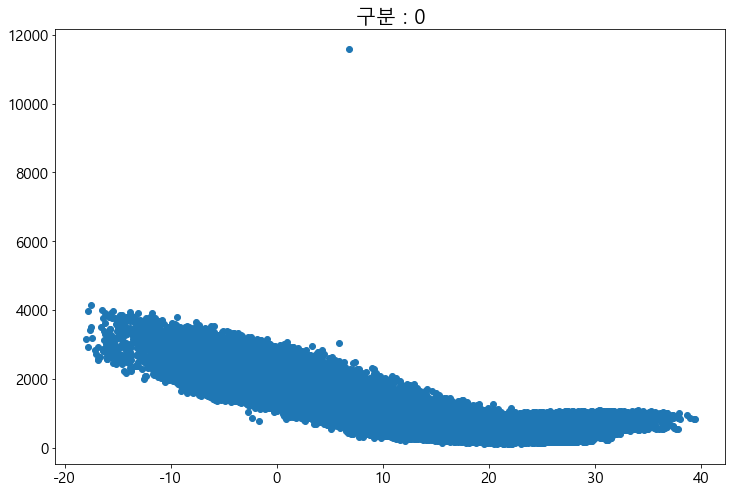

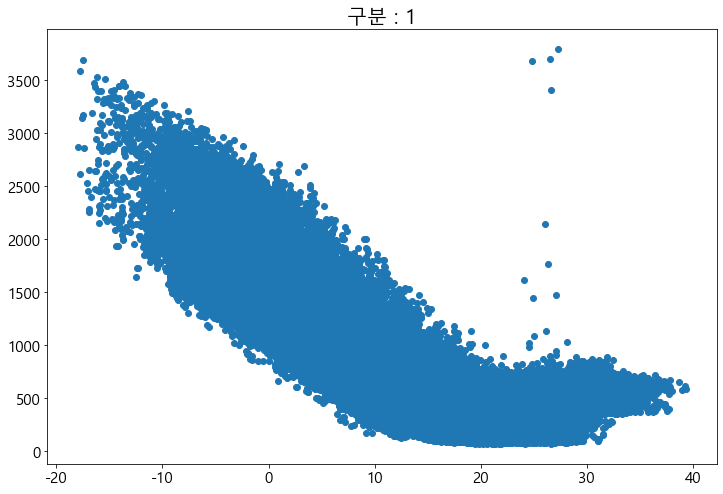

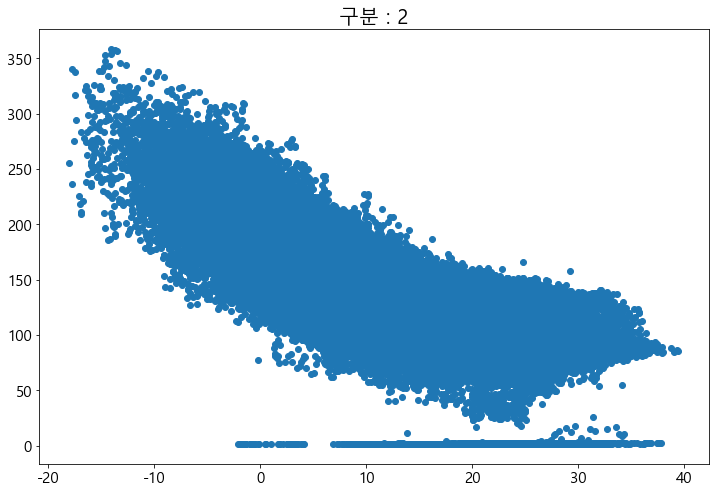

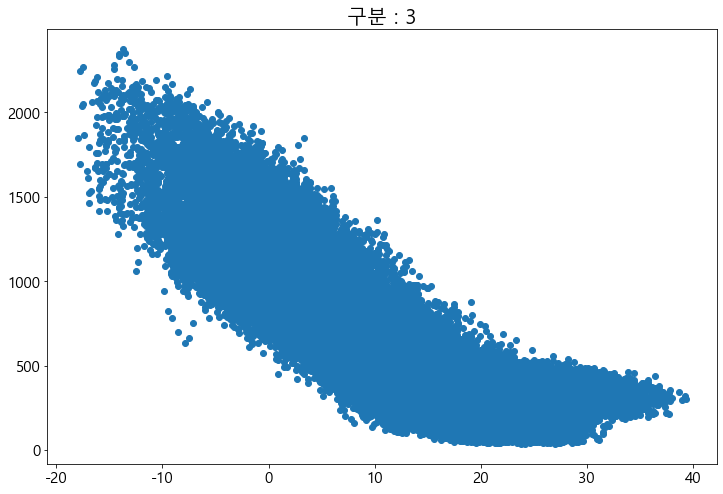

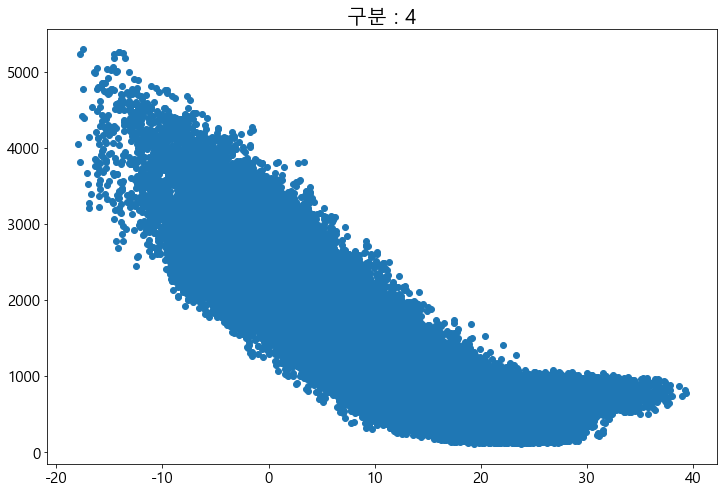

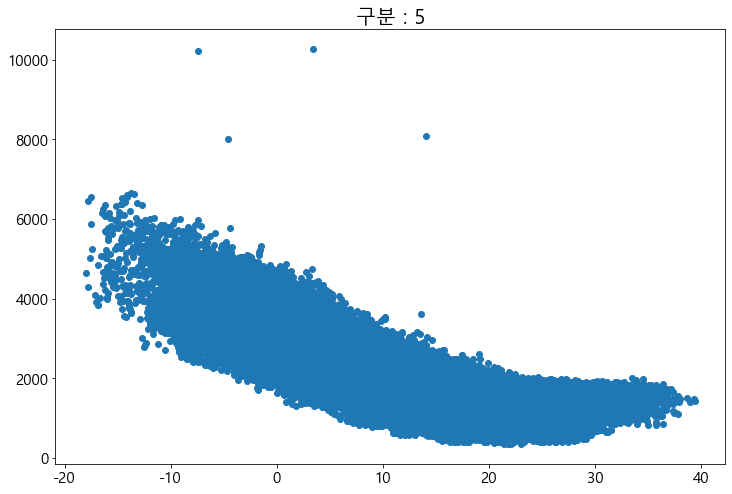

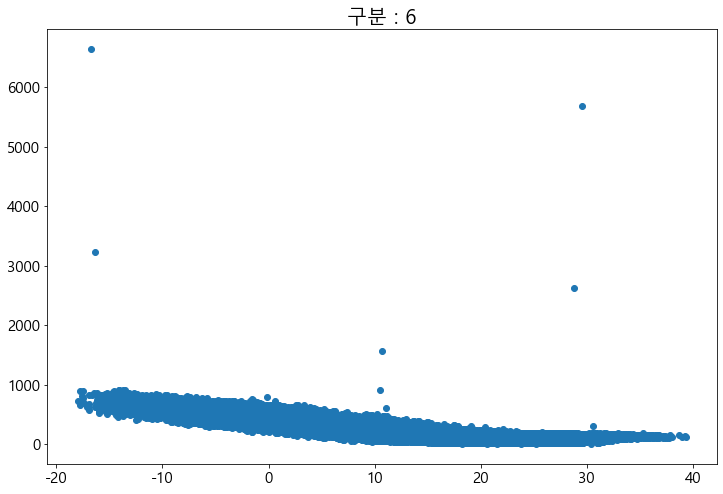

In [14]:
df_list = [df0, df1, df2, df3, df4, df5, df6]
for i, div in tqdm(enumerate(df_list)):
    plt.figure(figsize=(12,8))
    plt.title(f'구분 : {i}', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.scatter(x='기온', y='공급량', data=div)

In [15]:
# 가스공급량에서 이상치가 보임.

# 상관계수

<AxesSubplot:>

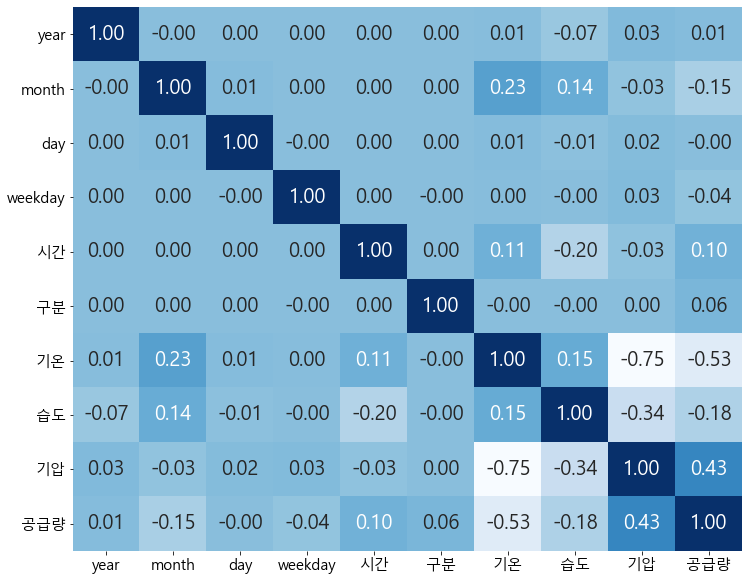

In [16]:
plt.figure(figsize=(12,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.heatmap(df[['year','month', 'day', 'weekday', '시간', '구분', '기온', '습도', '기압', '공급량']].corr(), cmap='Blues', annot=True, fmt='.2f', cbar=False, annot_kws={"size": 20})

(array([ 1631., 12285., 32193., 47222., 53382., 56679., 58002., 46487.,
        38262., 21945.]),
 array([  7. ,  16.3,  25.6,  34.9,  44.2,  53.5,  62.8,  72.1,  81.4,
         90.7, 100. ]),
 <BarContainer object of 10 artists>)

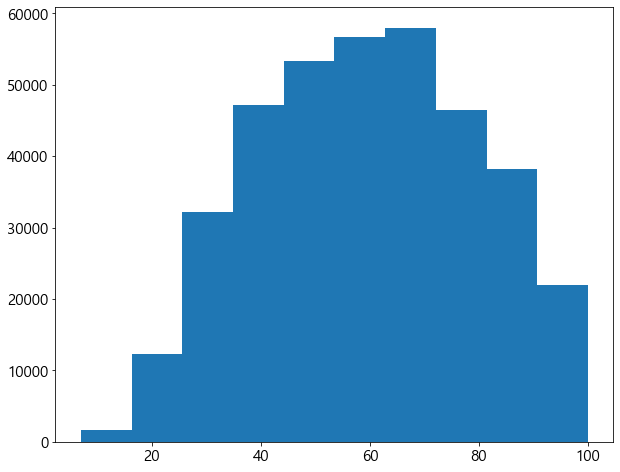

In [17]:
plt.figure(figsize=(10,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.hist(x='습도', data=df)

(array([  420.,  1414.,  9597., 43568., 77329., 70378., 79037., 60480.,
        23170.,  2695.]),
 array([ 976.5 ,  981.68,  986.86,  992.04,  997.22, 1002.4 , 1007.58,
        1012.76, 1017.94, 1023.12, 1028.3 ]),
 <BarContainer object of 10 artists>)

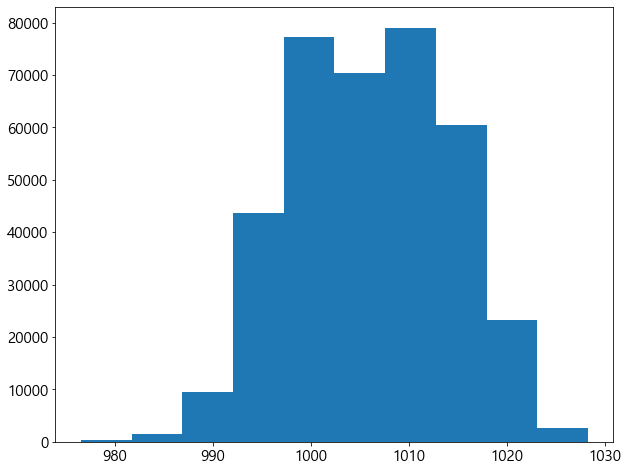

In [18]:
plt.figure(figsize=(10,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.hist(x='기압', data=df)

(array([ 1708., 12180., 36729., 52906., 48832., 49889., 64701., 73080.,
        26040.,  2023.]),
 array([-18.  , -12.26,  -6.52,  -0.78,   4.96,  10.7 ,  16.44,  22.18,
         27.92,  33.66,  39.4 ]),
 <BarContainer object of 10 artists>)

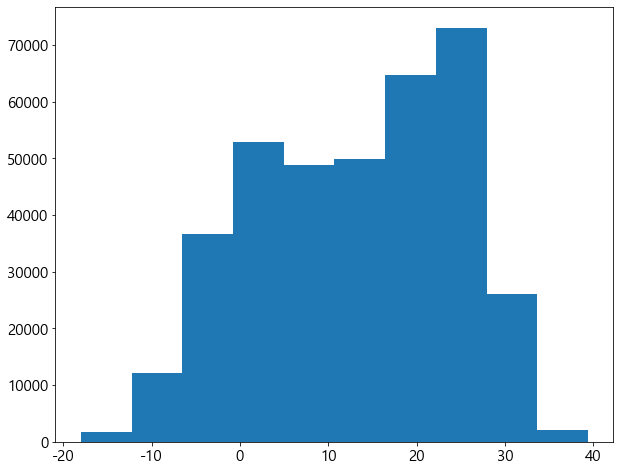

In [19]:
plt.figure(figsize=(10,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.hist(x='기온', data=df)

(array([2.56069e+05, 7.60110e+04, 2.76280e+04, 7.43600e+03, 8.86000e+02,
        5.30000e+01, 2.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([1.37800000e+00, 1.16060190e+03, 2.31982580e+03, 3.47904970e+03,
        4.63827360e+03, 5.79749750e+03, 6.95672140e+03, 8.11594530e+03,
        9.27516920e+03, 1.04343931e+04, 1.15936170e+04]),
 <BarContainer object of 10 artists>)

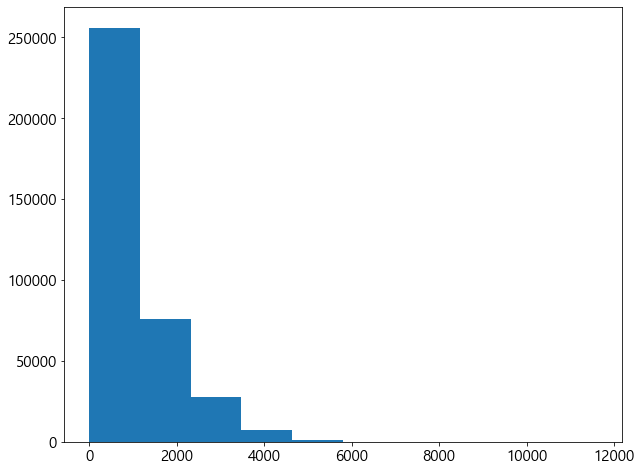

In [20]:
plt.figure(figsize=(10,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.hist(x='공급량', data=df)

# 달에 따른 공급량

100%|██████████| 7/7 [00:00<00:00, 19.66it/s]


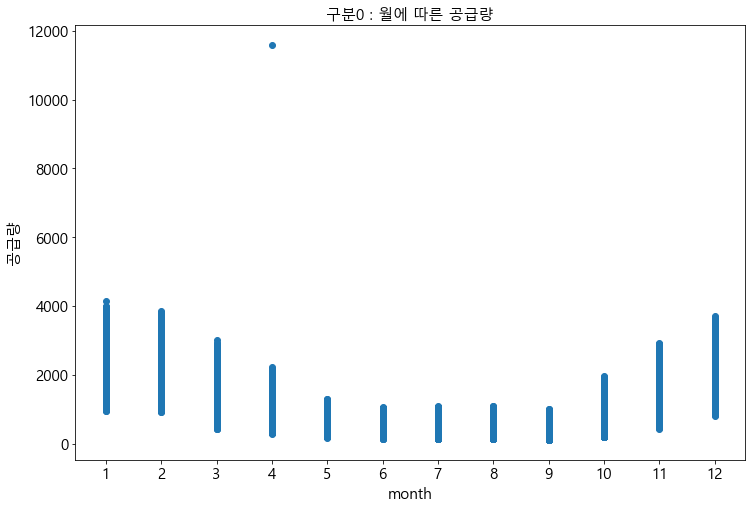

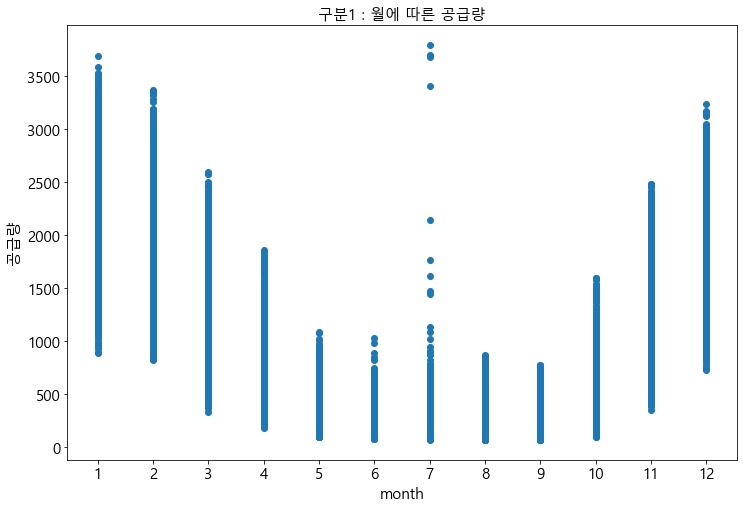

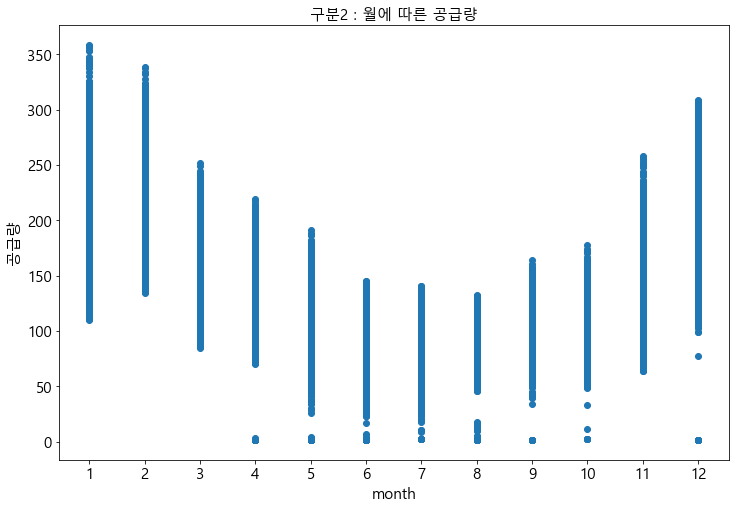

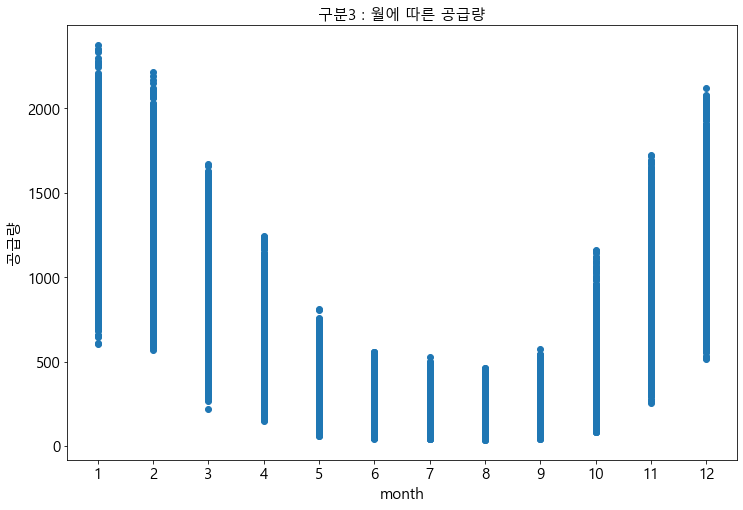

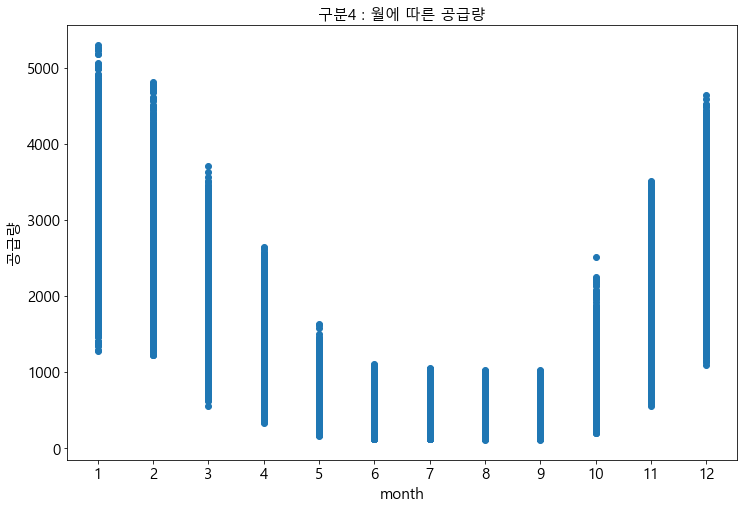

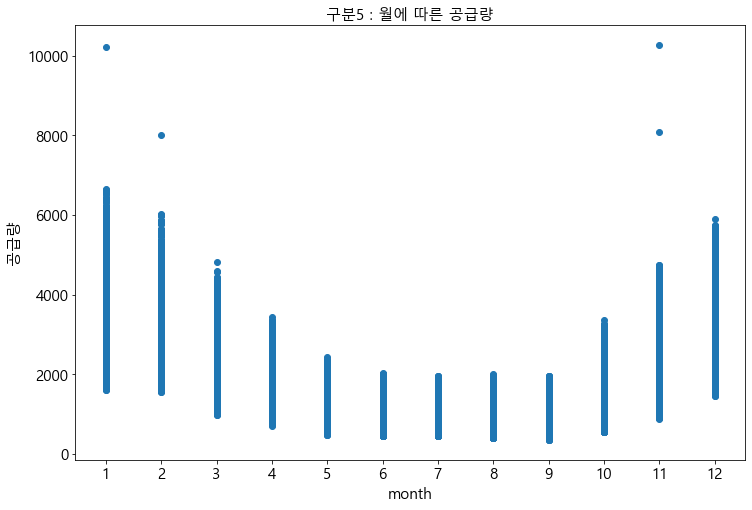

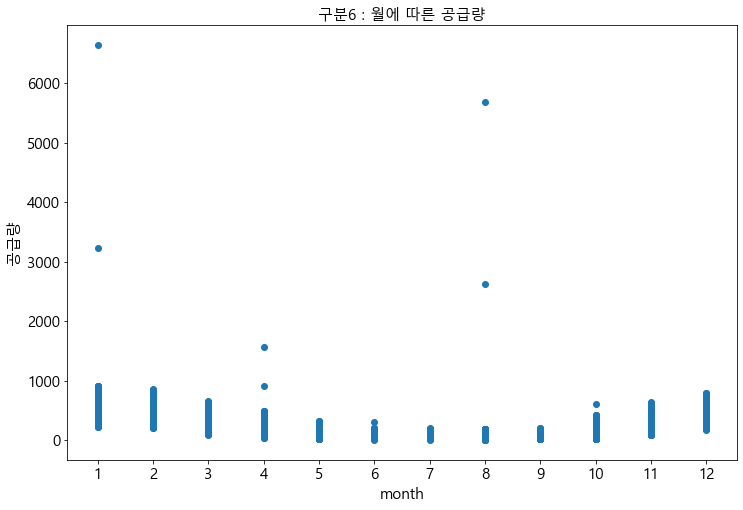

In [21]:
for div in tqdm(df['구분'].unique()):
    tmp = df[df['구분'] == div].reset_index(drop=True)
    plt.figure(figsize=(12,8))
    plt.xticks(range(1,13) ,fontsize=15)
    plt.xlabel('month', fontdict={'size':15})
    plt.yticks(fontsize=15)
    plt.ylabel('공급량', fontdict={'size':15})
    plt.title(f"구분{div} : 월에 따른 공급량", fontdict={'size':15})
    plt.scatter(x='month', y='공급량', data=tmp)

## 월별 공급량 이상치

In [22]:
# 공급량 이상치
# 구분0 : 4월에 10000초과 값 존재
    # 1개
# 구분1 : 7월에 1250초과 값 존재
    # 9개
# 구분2 : 4월 50미만, 5월 20미만, 9월 20미만, 10월 25미만, 12월 10미만
    # 226 + 900 + 38 + 6 + 46 = 1216개
# 구분3
# 구분4
# 구분5 : 1,2,11월에 7000초과
    # 4개
# 구분6 : 1,8월에 2000초과, 4월에 900초과
    # 2 + 2 + 2 = 6개
# 전체에서 공급량 3미만 값 제거

# 이상치 체크

In [23]:
# 전체
df[df['공급량'] < 3]

,연월일,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
37571,2013-08-12,2013,8,12,0,16,2,1.378,32.2,53.0,1000.0
37578,2013-08-12,2013,8,12,0,17,2,1.378,31.7,57.0,1000.0
37585,2013-08-12,2013,8,12,0,18,2,1.378,31.3,60.0,999.7
37592,2013-08-12,2013,8,12,0,19,2,1.378,30.3,67.0,999.7
37599,2013-08-12,2013,8,12,0,20,2,1.378,29.2,71.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...
354384,2018-10-11,2018,10,11,3,11,2,2.756,11.7,36.0,1013.0
354391,2018-10-11,2018,10,11,3,12,2,2.756,13.2,31.0,1012.6
354398,2018-10-11,2018,10,11,3,13,2,2.756,13.5,32.0,1012.0
354405,2018-10-11,2018,10,11,3,14,2,2.756,13.4,32.0,1011.6


In [24]:
# 구분0 : 4월에 10000넘는 값 존재
df0[df0['공급량'] > 10000]

,연월일,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
2230,2013-04-03,2013,4,3,2,23,0,11593.617,6.8,66.0,1006.5


In [25]:
# 구분1 : 7월에 1250이상인 값 존재
df1[(df1['month']==7) & (df1['공급량'] > 1250)]

,연월일,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
4507,2013-07-07,2013,7,7,6,20,1,1441.813,24.9,82.0,997.6
4747,2013-07-17,2013,7,17,2,20,1,1620.277,24.1,91.0,998.6
4771,2013-07-18,2013,7,18,3,20,1,3704.901,26.5,81.0,1000.0
4939,2013-07-25,2013,7,25,3,20,1,1474.949,27.1,63.0,991.5
4963,2013-07-26,2013,7,26,4,20,1,3798.613,27.3,66.0,993.2
4987,2013-07-27,2013,7,27,5,20,1,3682.997,24.8,72.0,995.2
5011,2013-07-28,2013,7,28,6,20,1,3412.565,26.6,88.0,992.4
5035,2013-07-29,2013,7,29,0,20,1,1770.149,26.4,78.0,992.4
5059,2013-07-30,2013,7,30,1,20,1,2145.991,26.1,79.0,990.4


In [26]:
# 구분2 : 4월 50이하, 5월 20이하, 9월 20이하, 10월 25이하, 12월 10이하
df2[(df2['month']==4) & (df2['공급량'] < 50)]

,연월일,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
11414,2014-04-21,2014,4,21,0,15,2,2.978,20.9,30.0,1003.3
11415,2014-04-21,2014,4,21,0,16,2,1.378,20.8,31.0,1003.4
11416,2014-04-21,2014,4,21,0,17,2,1.378,19.4,30.0,1003.7
11417,2014-04-21,2014,4,21,0,18,2,1.378,18.3,34.0,1003.7
11418,2014-04-21,2014,4,21,0,19,2,1.378,16.6,40.0,1003.6
...,...,...,...,...,...,...,...,...,...,...,...
11635,2014-04-30,2014,4,30,2,20,2,1.378,16.2,54.0,999.9
11636,2014-04-30,2014,4,30,2,21,2,1.378,14.7,54.0,1000.5
11637,2014-04-30,2014,4,30,2,22,2,1.378,14.0,54.0,1001.3
11638,2014-04-30,2014,4,30,2,23,2,1.378,13.8,59.0,1001.5


In [27]:
# 구분2 : 4월 50이하, 
# 5월 20이하, 9월 20이하, 10월 25이하, 12월 10이하
df2[(df2['month']==5) & (df2['공급량'] < 20)]

,연월일,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
11640,2014-05-01,2014,5,1,3,1,2,1.378,12.7,65.0,1001.4
11641,2014-05-01,2014,5,1,3,2,2,1.378,12.2,68.0,1001.6
11642,2014-05-01,2014,5,1,3,3,2,1.378,11.9,71.0,1001.6
11643,2014-05-01,2014,5,1,3,4,2,1.378,11.2,76.0,1001.7
11644,2014-05-01,2014,5,1,3,5,2,1.378,10.8,79.0,1002.0
...,...,...,...,...,...,...,...,...,...,...,...
29717,2016-05-23,2016,5,23,0,6,2,1.378,18.4,57.0,1005.1
29718,2016-05-23,2016,5,23,0,7,2,1.378,19.3,49.0,1005.0
29719,2016-05-23,2016,5,23,0,8,2,1.378,21.3,44.0,1005.1
29720,2016-05-23,2016,5,23,0,9,2,1.378,23.6,35.0,1004.9


In [28]:
# 구분2 : 4월 50이하, 5월 20이하, 
# 9월 20이하, 10월 25이하, 12월 10이하
df2[(df2['month']==9) & (df2['공급량'] < 20)]
# 38개

,연월일,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
5832,2013-09-01,2013,9,1,6,1,2,1.378,21.8,71.0,1000.0
5833,2013-09-01,2013,9,1,6,2,2,1.378,21.2,71.0,1000.0
5834,2013-09-01,2013,9,1,6,3,2,1.378,20.7,74.0,1000.3
5835,2013-09-01,2013,9,1,6,4,2,1.378,20.5,74.0,1000.3
5836,2013-09-01,2013,9,1,6,5,2,1.378,20.2,77.0,1000.8
5837,2013-09-01,2013,9,1,6,6,2,1.378,19.9,79.0,1001.4
5838,2013-09-01,2013,9,1,6,7,2,1.378,19.9,80.0,1001.8
5839,2013-09-01,2013,9,1,6,8,2,1.378,20.9,75.0,1002.2
5840,2013-09-01,2013,9,1,6,9,2,1.378,22.7,66.0,1002.4
5841,2013-09-01,2013,9,1,6,10,2,1.378,23.7,64.0,1002.5


In [29]:
# 구분2 : 4월 50이하, 5월 20이하, 9월 20이하, 
# 10월 25이하, 12월 10이하
df2[(df2['month']==10) & (df2['공급량'] < 25)]
# 6개

,연월일,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
50626,2018-10-11,2018,10,11,3,11,2,2.756,11.7,36.0,1013.0
50627,2018-10-11,2018,10,11,3,12,2,2.756,13.2,31.0,1012.6
50628,2018-10-11,2018,10,11,3,13,2,2.756,13.5,32.0,1012.0
50629,2018-10-11,2018,10,11,3,14,2,2.756,13.4,32.0,1011.6
50630,2018-10-11,2018,10,11,3,15,2,2.756,13.0,39.0,1011.5
50631,2018-10-11,2018,10,11,3,16,2,11.489,13.8,36.0,1011.7


In [30]:
# 구분2 : 4월 50이하, 5월 20이하, 9월 20이하, 10월 25이하,
#  12월 10이하
df2[(df2['month']==12) & (df2['공급량'] < 10)]
# 46개

,연월일,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
16980,2014-12-09,2014,12,9,1,13,2,1.378,1.8,31.0,1024.6
16981,2014-12-09,2014,12,9,1,14,2,1.378,2.6,29.0,1024.0
16982,2014-12-09,2014,12,9,1,15,2,1.378,3.1,27.0,1023.6
16983,2014-12-09,2014,12,9,1,16,2,1.378,3.0,29.0,1023.2
16984,2014-12-09,2014,12,9,1,17,2,1.378,1.9,30.0,1023.0
16985,2014-12-09,2014,12,9,1,18,2,1.378,-0.2,38.0,1023.4
16986,2014-12-09,2014,12,9,1,19,2,1.378,-0.9,40.0,1023.1
16987,2014-12-09,2014,12,9,1,20,2,1.378,-1.5,41.0,1022.4
16988,2014-12-09,2014,12,9,1,21,2,1.378,-1.7,42.0,1023.5
16989,2014-12-09,2014,12,9,1,22,2,1.378,-2.1,45.0,1023.3


In [31]:
# 구분5 : 1,2,11월에 7000이상
df5[(df5['공급량'] > 7000)]

,연월일,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
647,2013-01-27,2013,1,27,6,24,5,10207.077,-7.4,52.0,1016.0
16391,2014-11-14,2014,11,14,4,24,5,10271.437,3.4,55.0,1017.2
25309,2015-11-21,2015,11,21,5,14,5,8086.693,14.1,39.0,1015.0
35953,2017-02-07,2017,2,7,1,2,5,8005.709,-4.6,56.0,1015.8


In [32]:
# 구분6 : 1,8월에 2000이상, 4월에 9000이상
df6[(df6['month']==1) & (df6['공급량'] > 2000)]

,연월일,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
26832,2016-01-24,2016,1,24,6,1,6,3227.524,-16.4,48.0,1015.7
26833,2016-01-24,2016,1,24,6,2,6,6644.788,-16.7,49.0,1014.8


In [33]:
# 구분6 : 1,
# 8월에 2000이상, 4월에 900이상
df6[(df6['month']==8) & (df6['공급량'] > 2000)]

,연월일,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
40355,2017-08-09,2017,8,9,2,12,6,2620.516,28.8,53.0,988.0
40356,2017-08-09,2017,8,9,2,13,6,5676.964,29.6,50.0,987.8


In [34]:
# 구분6 : 1,8월에 2000이상, 
# 4월에 900이상
df6[(df6['month']==4) & (df6['공급량'] > 900)]

,연월일,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
28732,2016-04-12,2016,4,12,1,5,6,1557.836,10.7,54.0,1009.0
28733,2016-04-12,2016,4,12,1,6,6,908.780,10.5,54.0,1008.4


# 일자별 공급량 변화

## 연도별

100%|██████████| 7/7 [00:00<00:00, 12.62it/s]


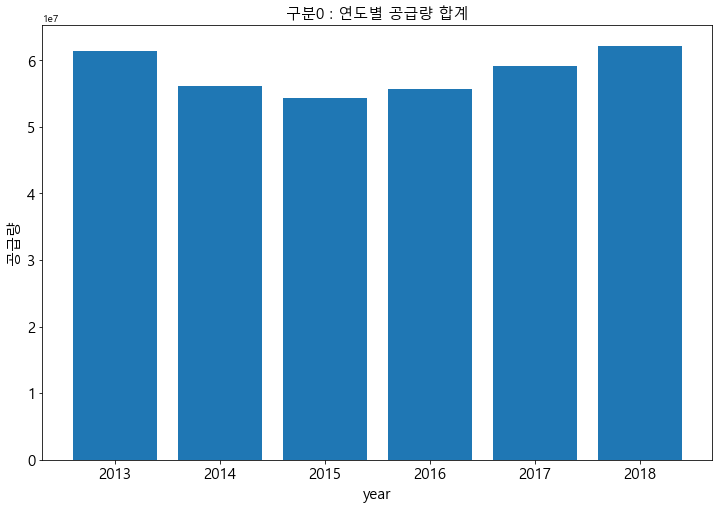

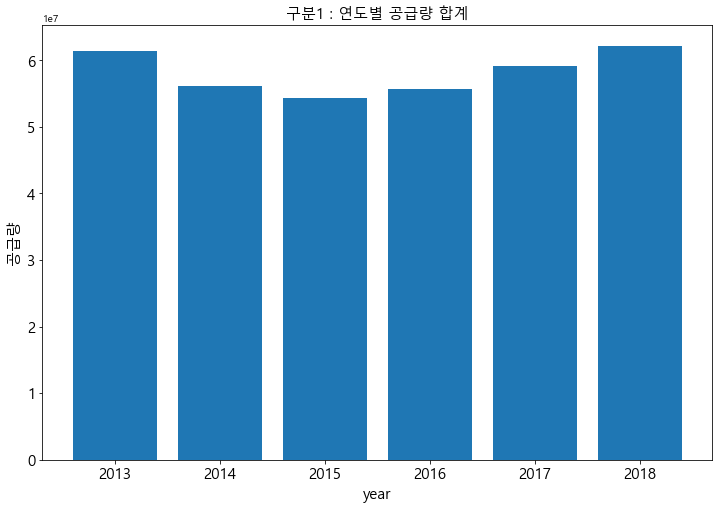

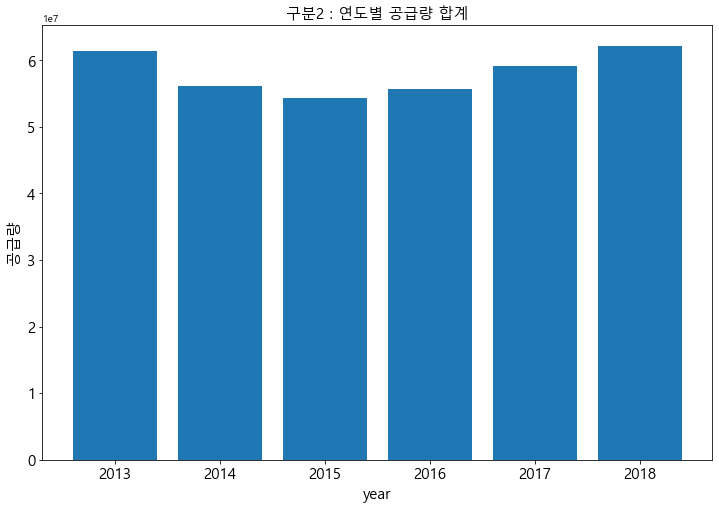

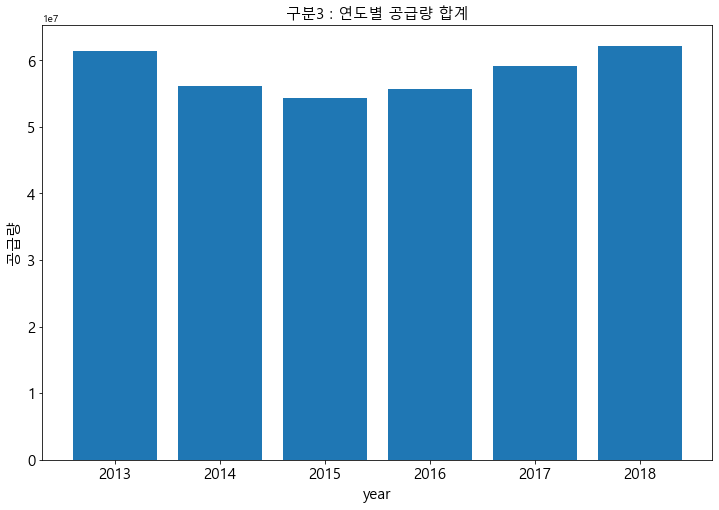

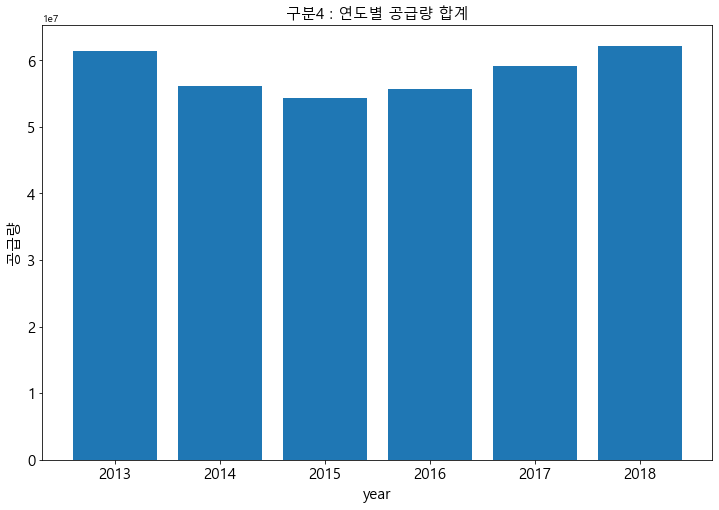

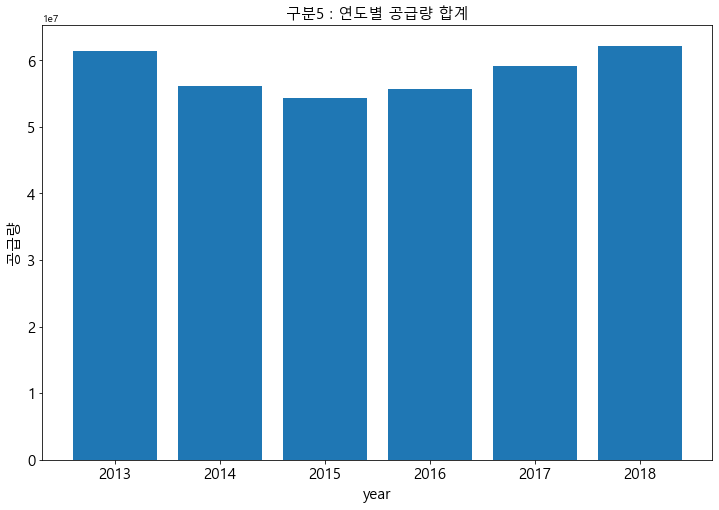

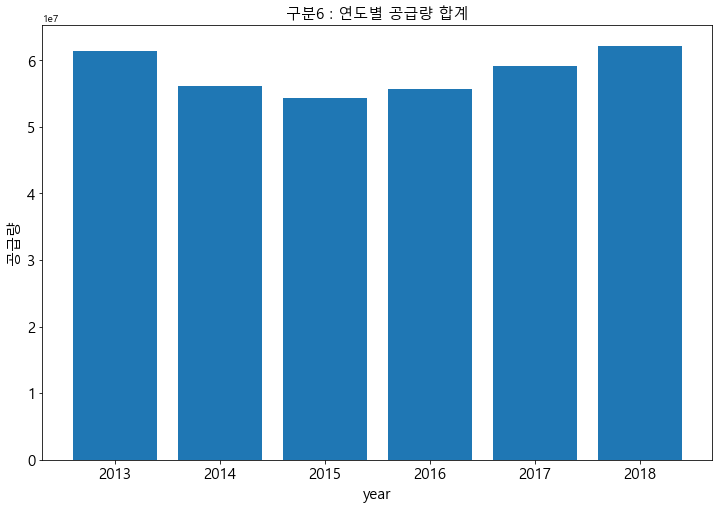

In [35]:
for div in tqdm(df['구분'].unique()):
    tmp = df[df['구분'] == div].reset_index(drop=True)
    plt.figure(figsize=(12,8))
    plt.xticks(range(2013,2019) ,fontsize=15)
    plt.xlabel('year', fontdict={'size':15})
    plt.yticks(fontsize=15)
    plt.ylabel('공급량', fontdict={'size':15})
    plt.title(f"구분{div} : 연도별 공급량 합계", fontdict={'size':15})
    plt.bar(range(2013,2019), df.groupby(['year']).sum()['공급량'])

### 산점도 일별 공급량

7it [00:00, 21.73it/s]


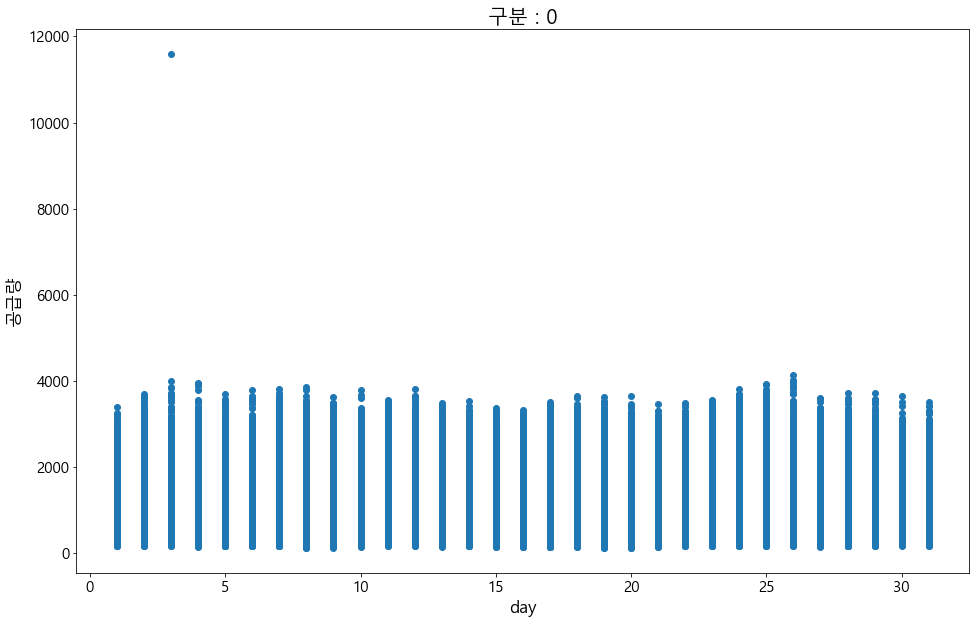

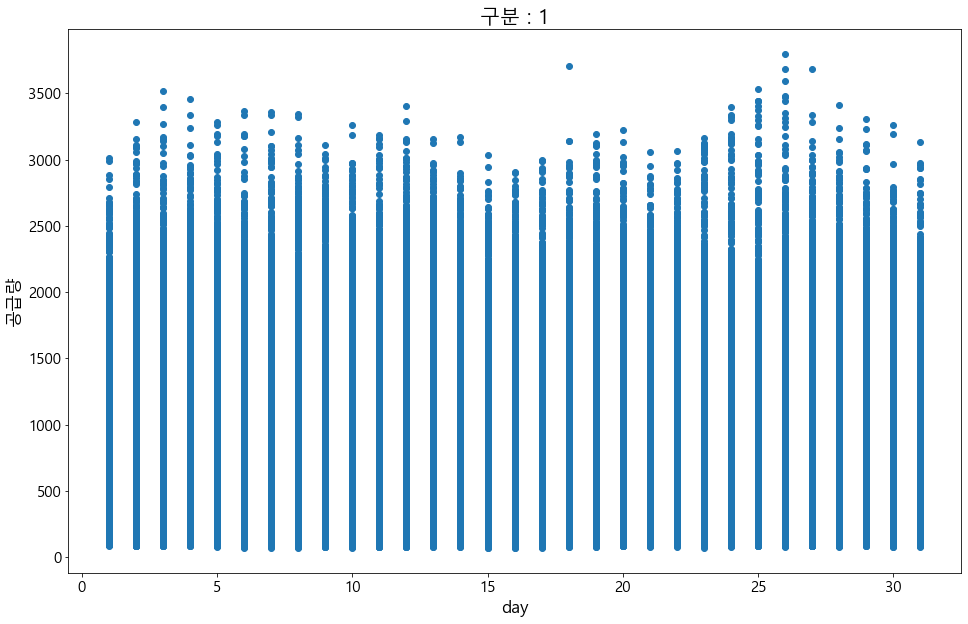

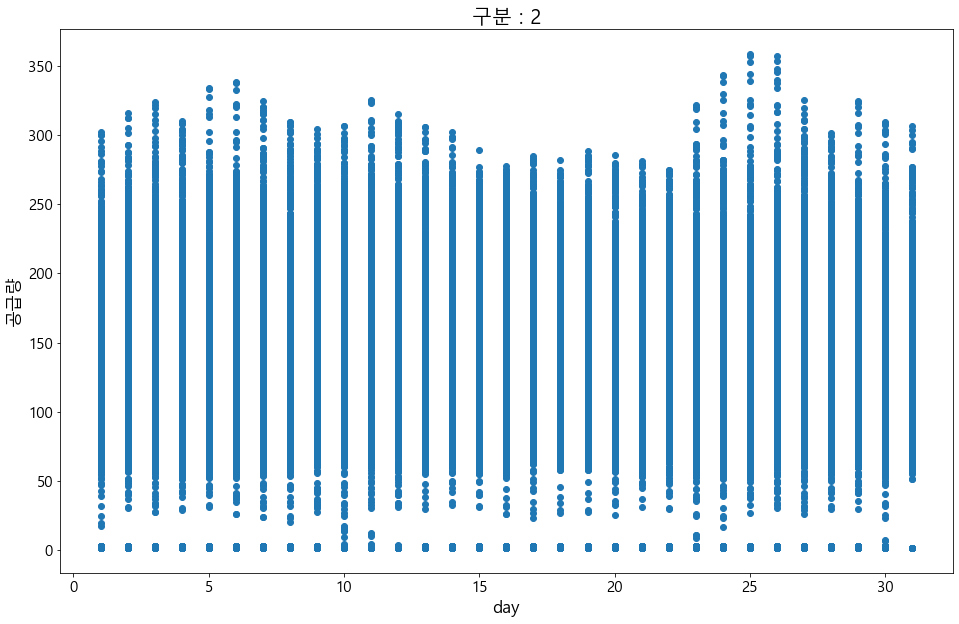

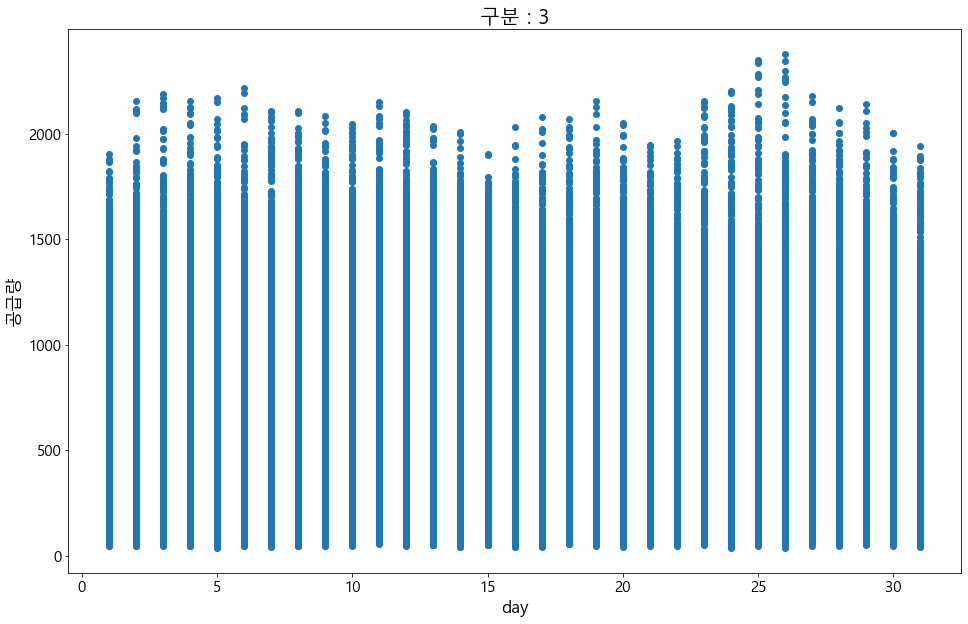

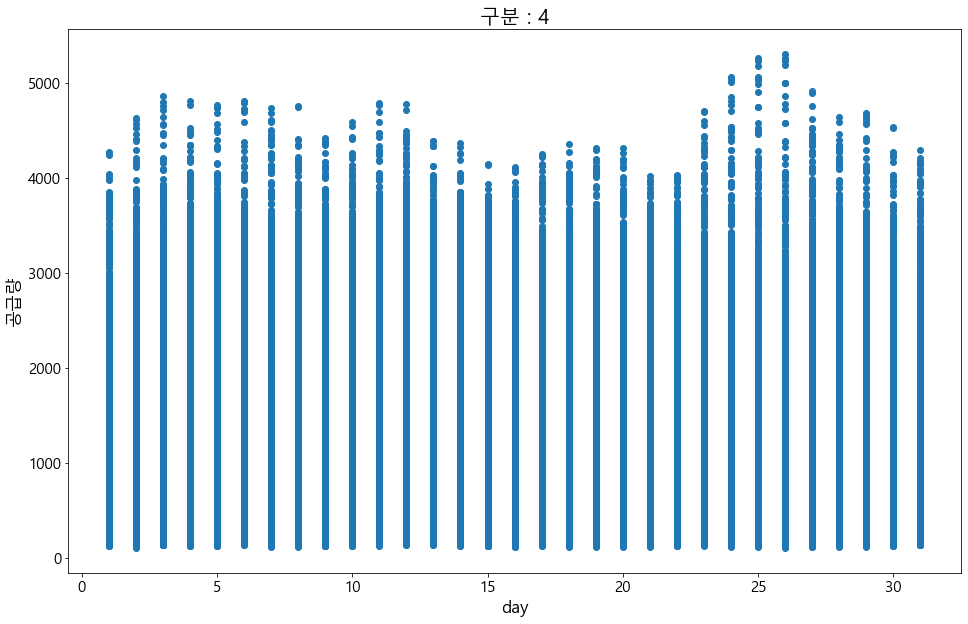

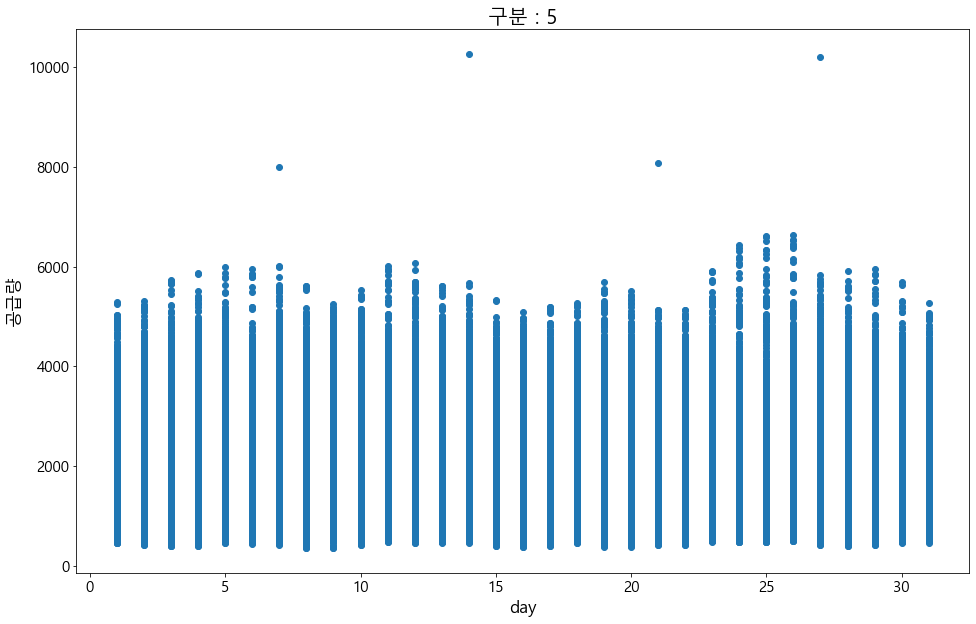

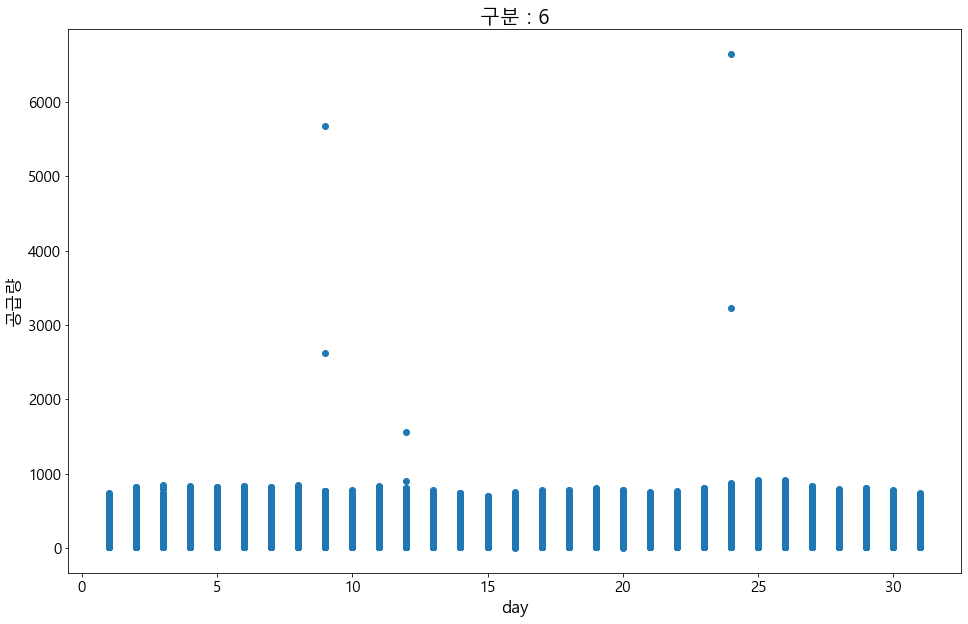

In [40]:
df_list = [df0, df1, df2, df3, df4, df5, df6]
for i, div in tqdm(enumerate(df_list)):
    plt.figure(figsize=(16,10))
    plt.title(f'구분 : {i}', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.xlabel('day', fontdict={'size':17})
    plt.yticks(fontsize=15)
    plt.ylabel('공급량', fontdict={'size':17})
    plt.scatter(x='day', y='공급량', data=div)

## 월별

100%|██████████| 7/7 [00:00<00:00, 10.44it/s]


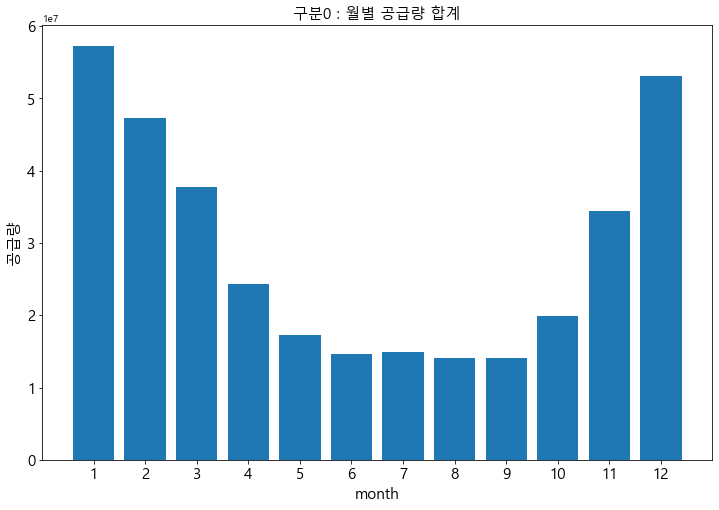

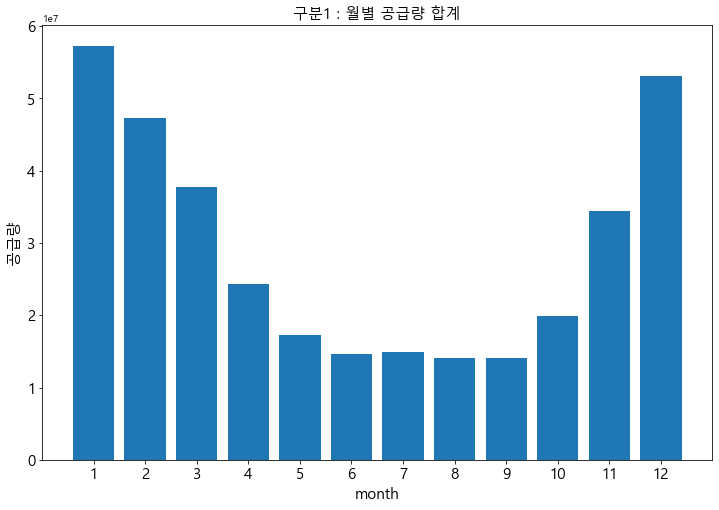

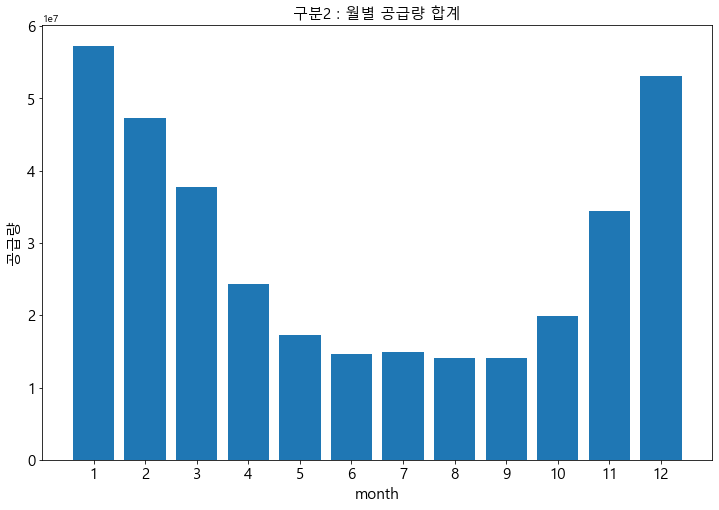

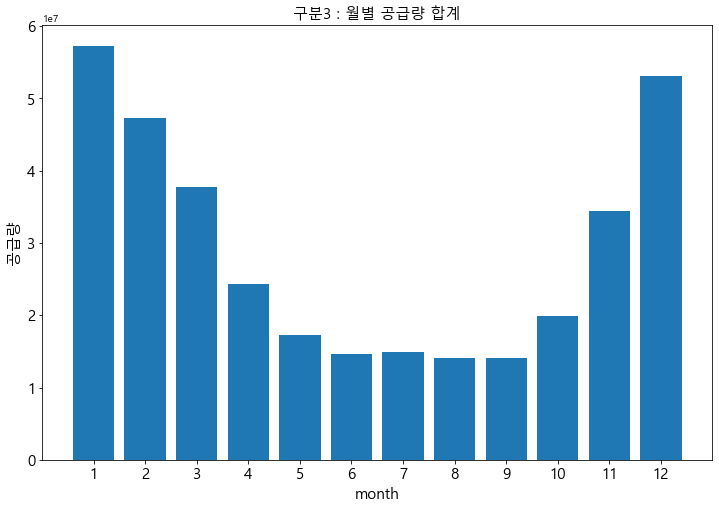

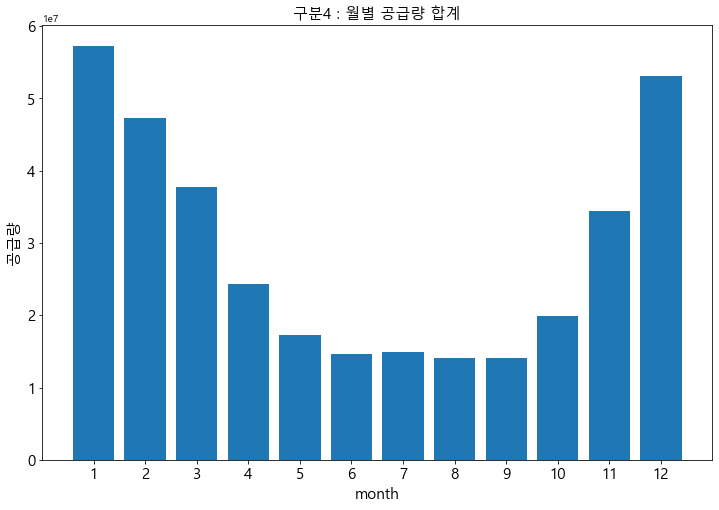

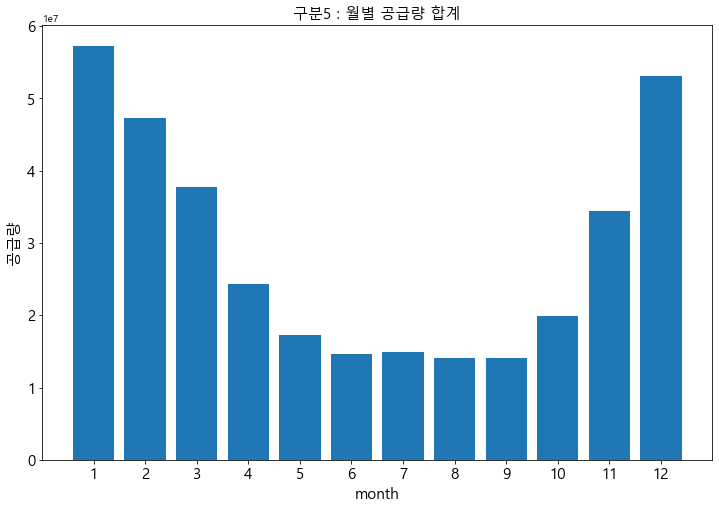

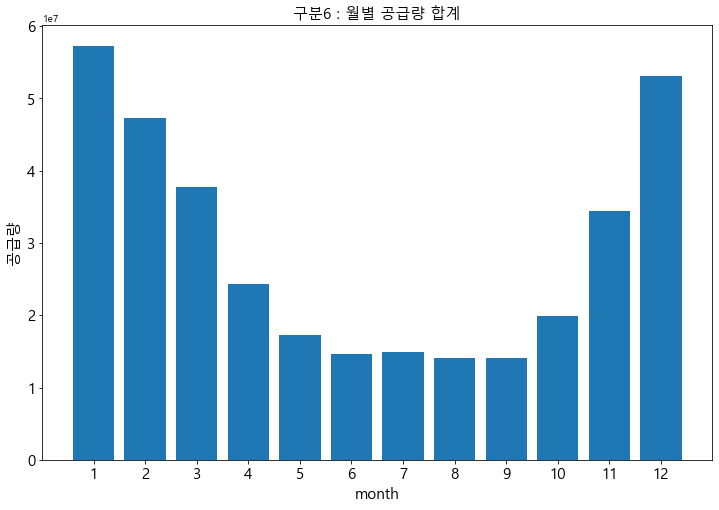

In [36]:
for div in tqdm(df['구분'].unique()):
    tmp = df[df['구분'] == div].reset_index(drop=True)
    plt.figure(figsize=(12,8))
    plt.xticks(range(1,13) ,fontsize=15)
    plt.xlabel('month', fontdict={'size':15})
    plt.yticks(fontsize=15)
    plt.ylabel('공급량', fontdict={'size':15})
    plt.title(f"구분{div} : 월별 공급량 합계", fontdict={'size':15})
    plt.bar(range(1,13), df.groupby(['month']).sum()['공급량'])

## 일별

100%|██████████| 7/7 [00:00<00:00,  7.97it/s]


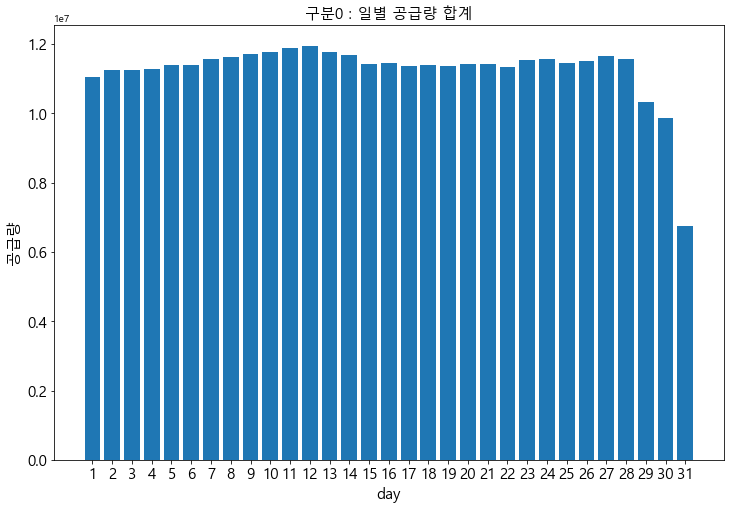

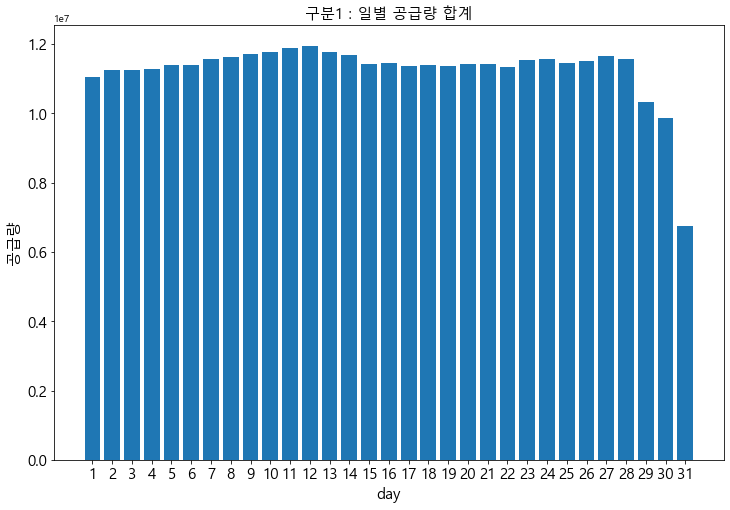

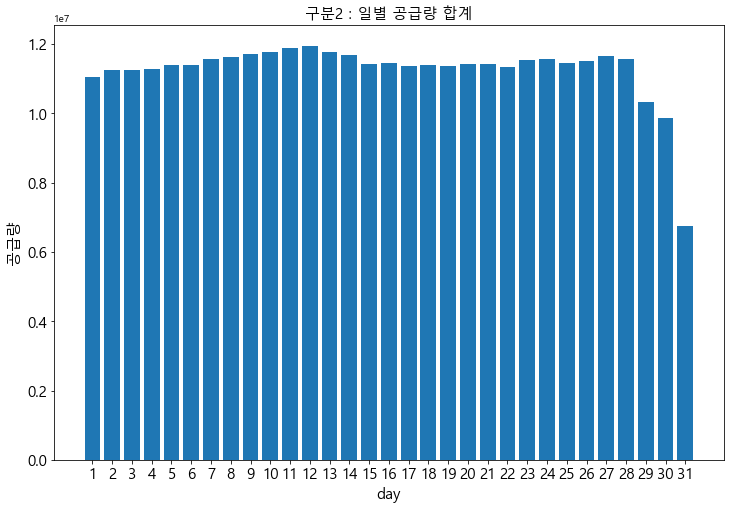

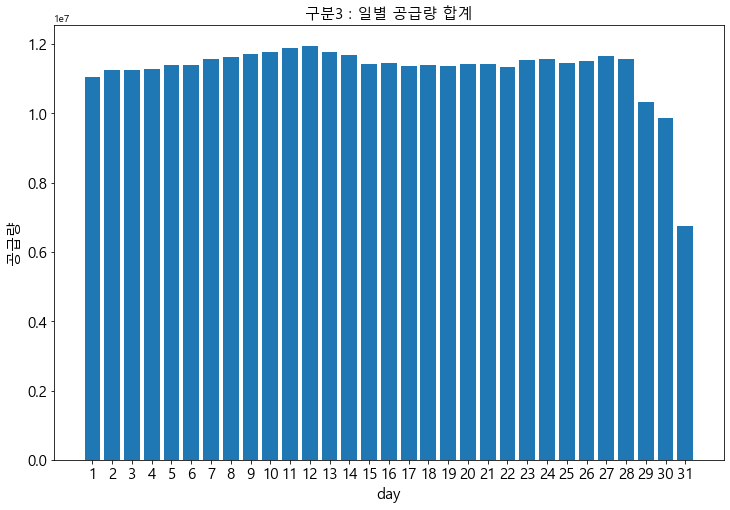

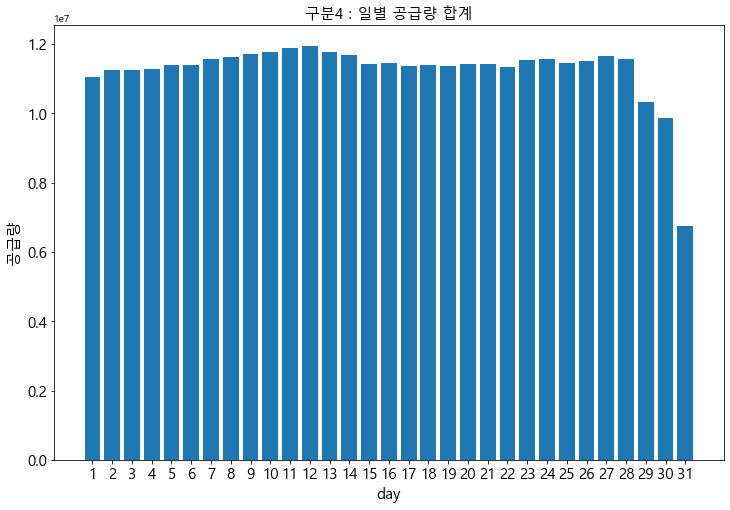

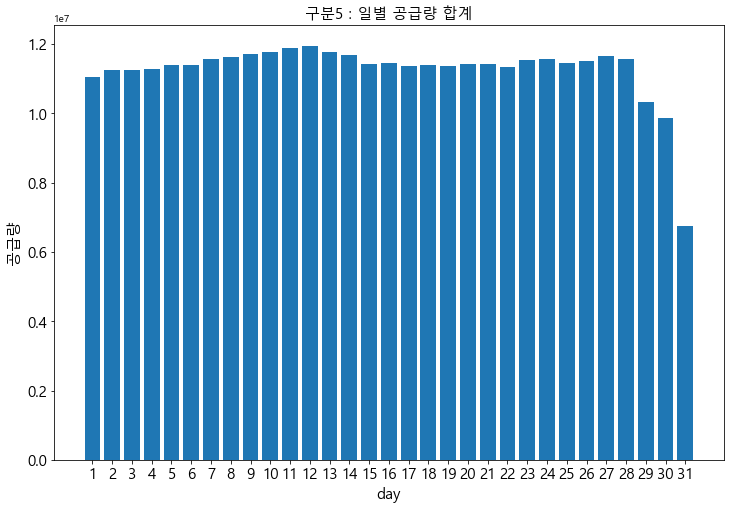

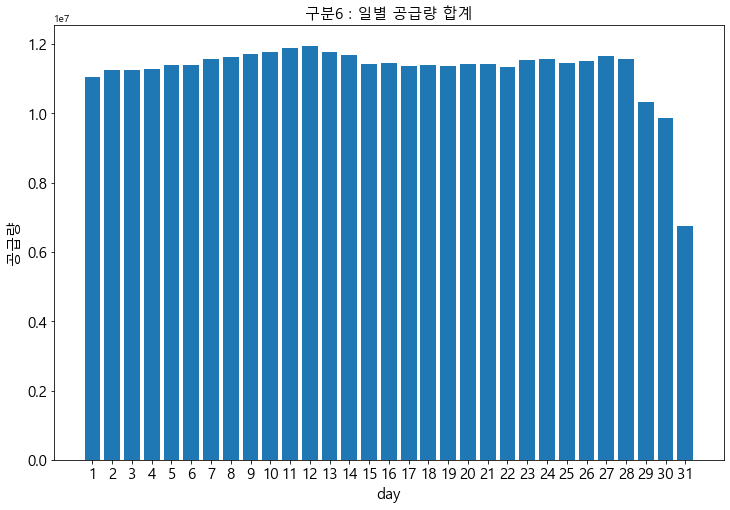

In [37]:
for div in tqdm(df['구분'].unique()):
    tmp = df[df['구분'] == div].reset_index(drop=True)
    plt.figure(figsize=(12,8))
    plt.xticks(range(1,32) ,fontsize=15)
    plt.xlabel('day', fontdict={'size':15})
    plt.yticks(fontsize=15)
    plt.ylabel('공급량', fontdict={'size':15})
    plt.title(f"구분{div} : 일별 공급량 합계", fontdict={'size':15})
    plt.bar(range(1,32), df.groupby(['day']).sum()['공급량'])

## weekday별

100%|██████████| 7/7 [00:00<00:00,  9.38it/s]


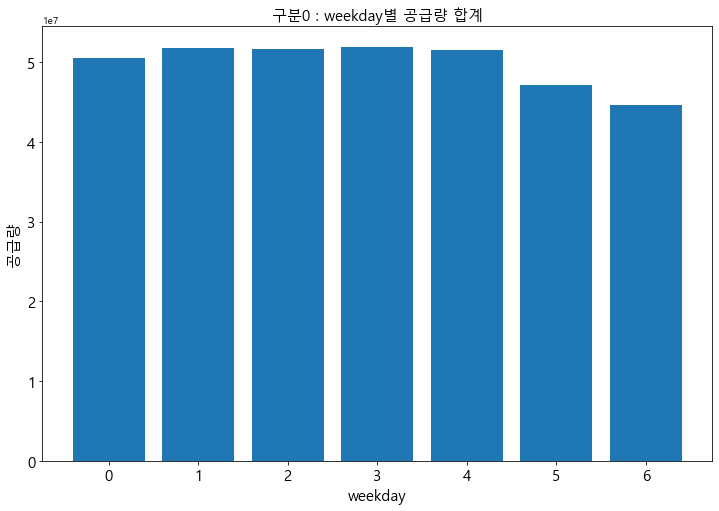

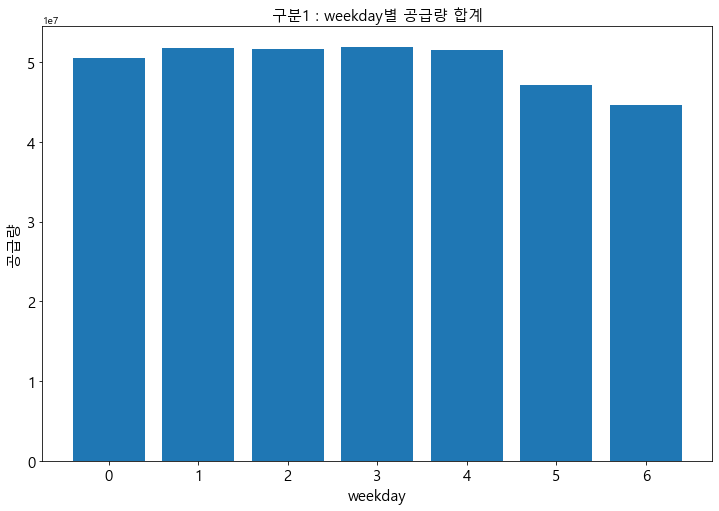

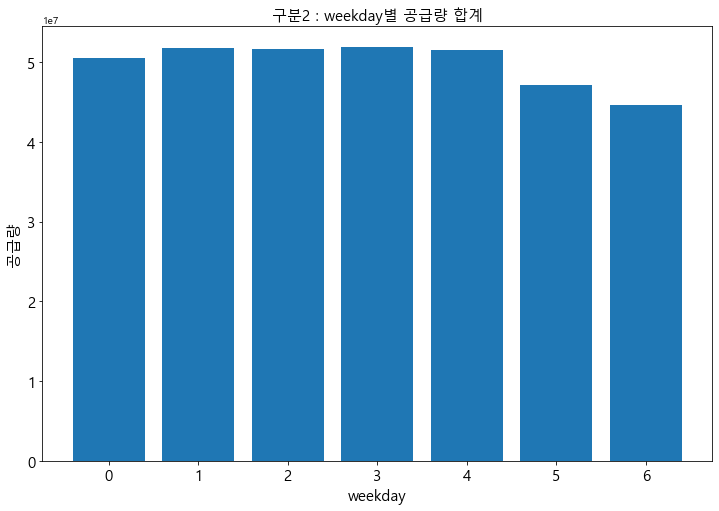

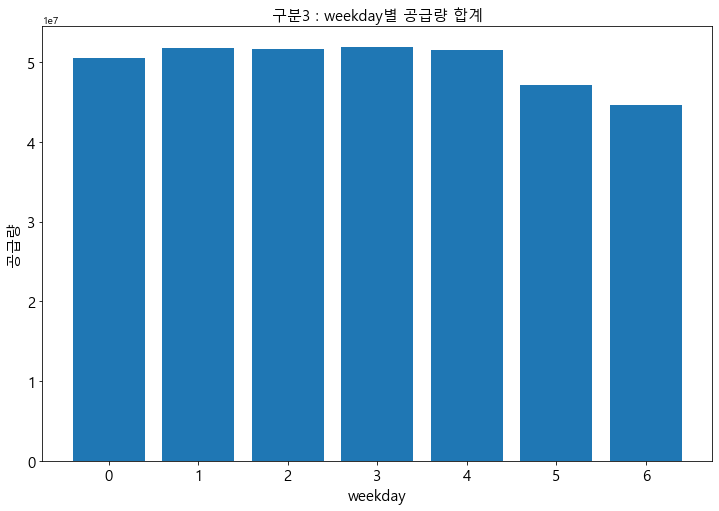

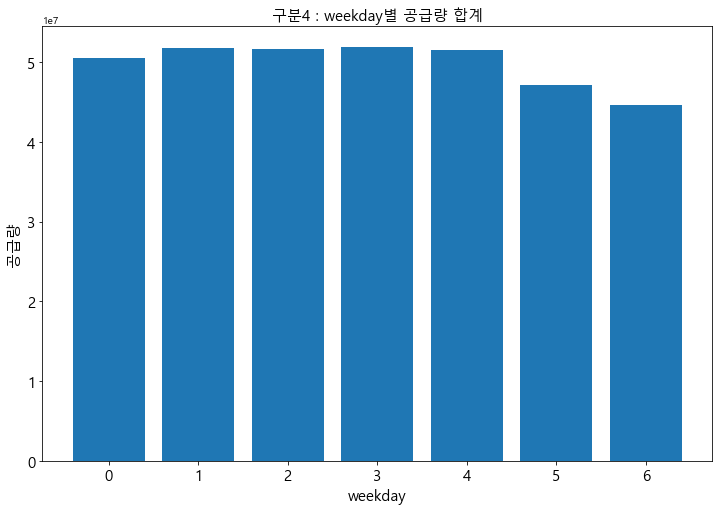

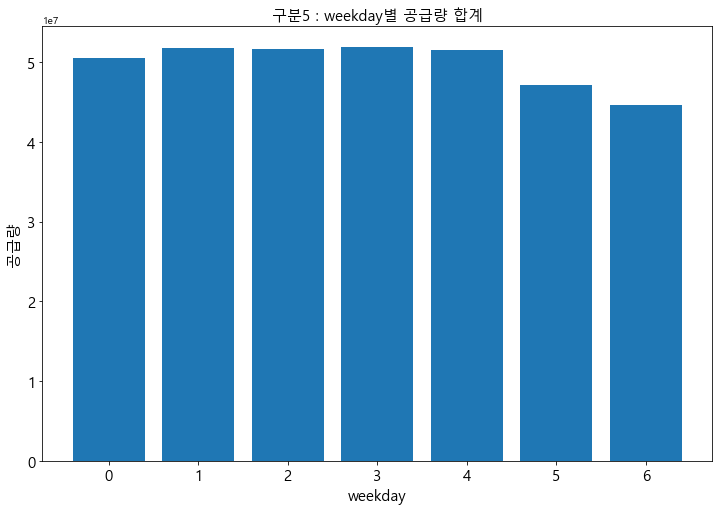

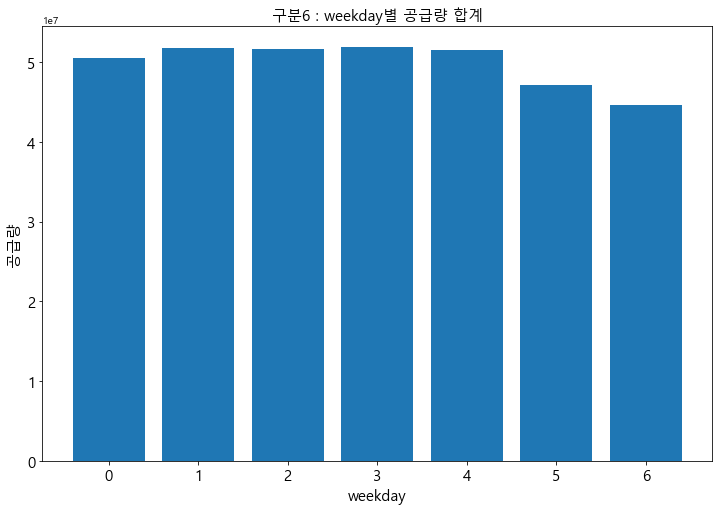

In [38]:
for div in tqdm(df['구분'].unique()):
    tmp = df[df['구분'] == div].reset_index(drop=True)
    plt.figure(figsize=(12,8))
    plt.xticks(range(7) ,fontsize=15)
    plt.xlabel('weekday', fontdict={'size':15})
    plt.yticks(fontsize=15)
    plt.ylabel('공급량', fontdict={'size':15})
    plt.title(f"구분{div} : weekday별 공급량 합계", fontdict={'size':15})
    plt.bar(range(7), df.groupby(['weekday']).sum()['공급량'])

### 산점도 weekday별 공급량

7it [00:00, 27.31it/s]


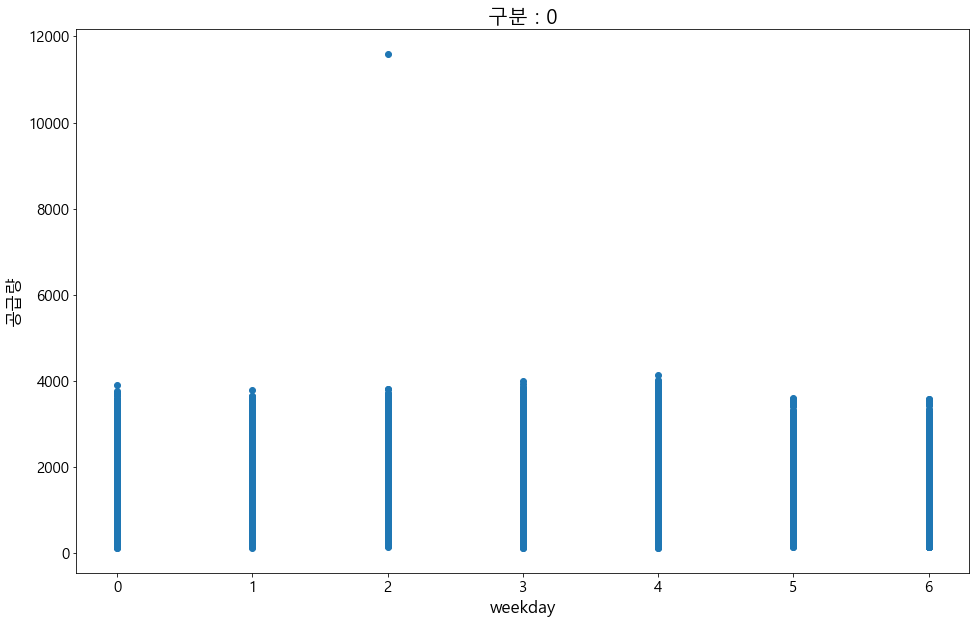

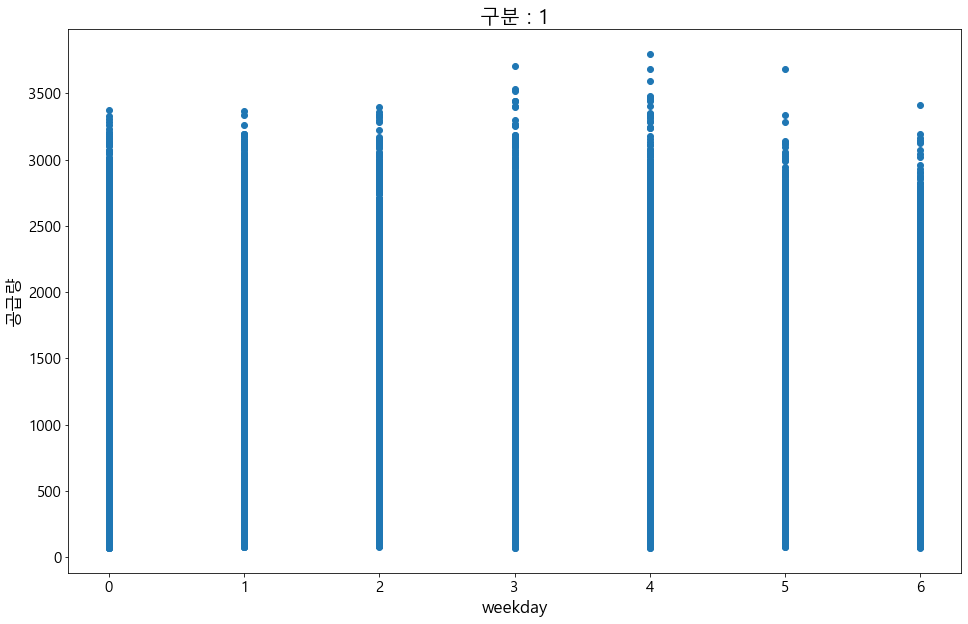

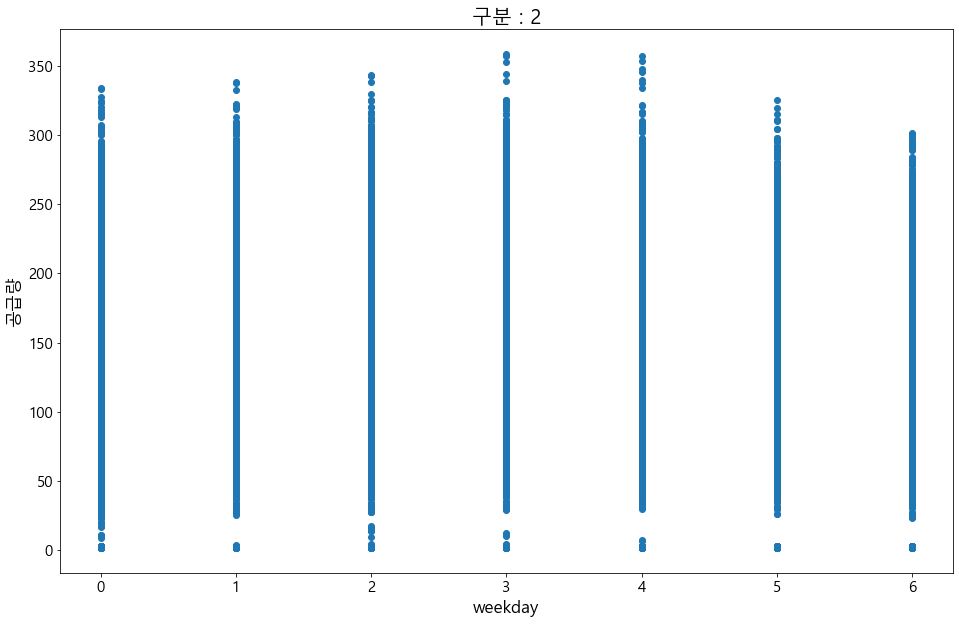

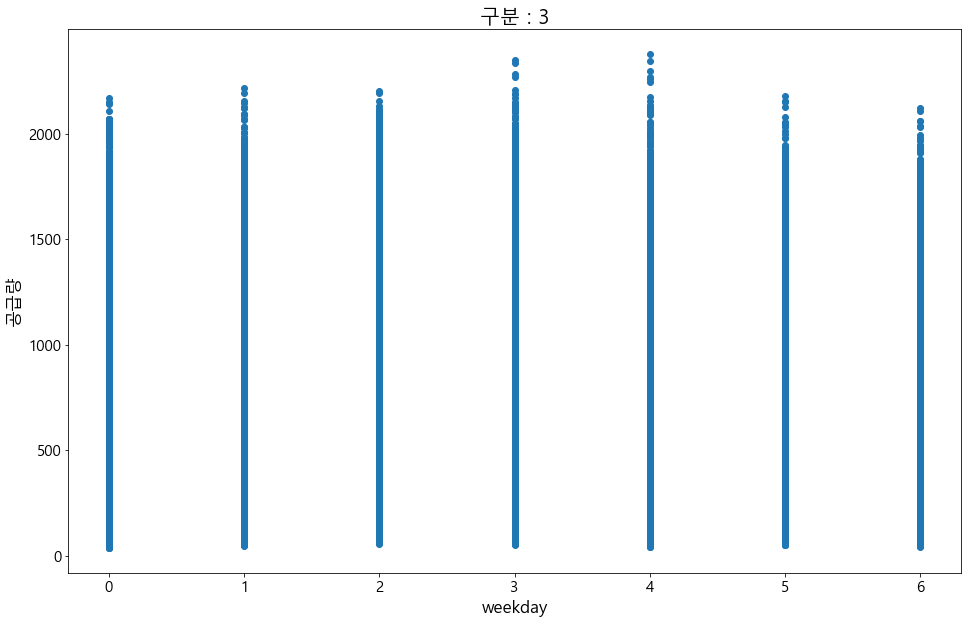

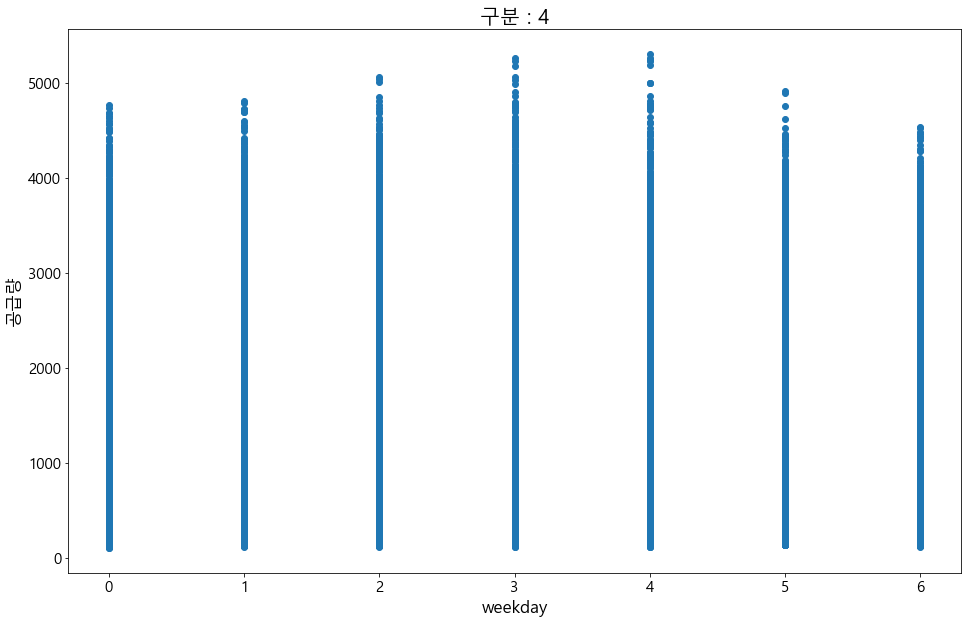

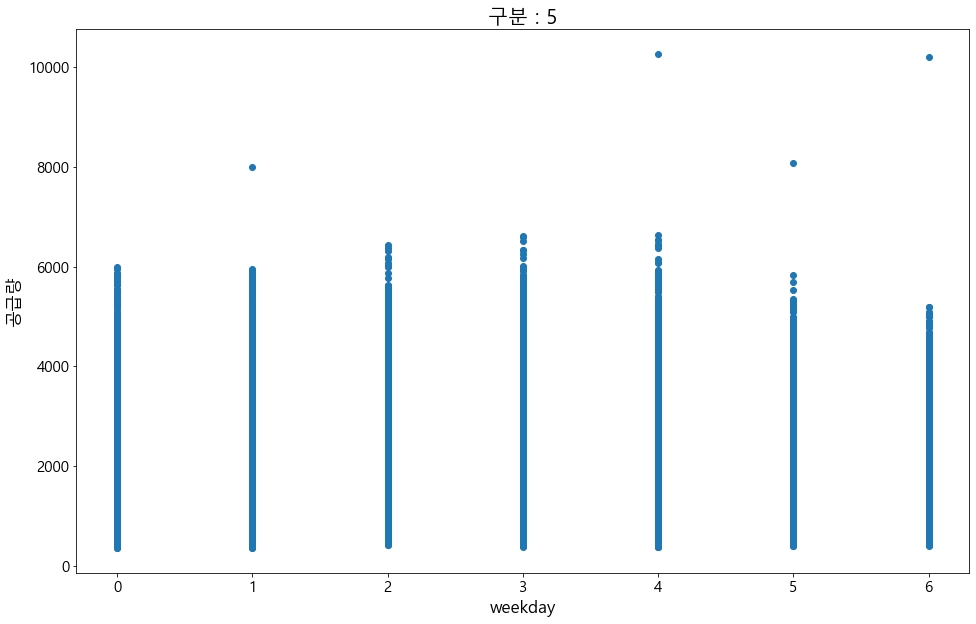

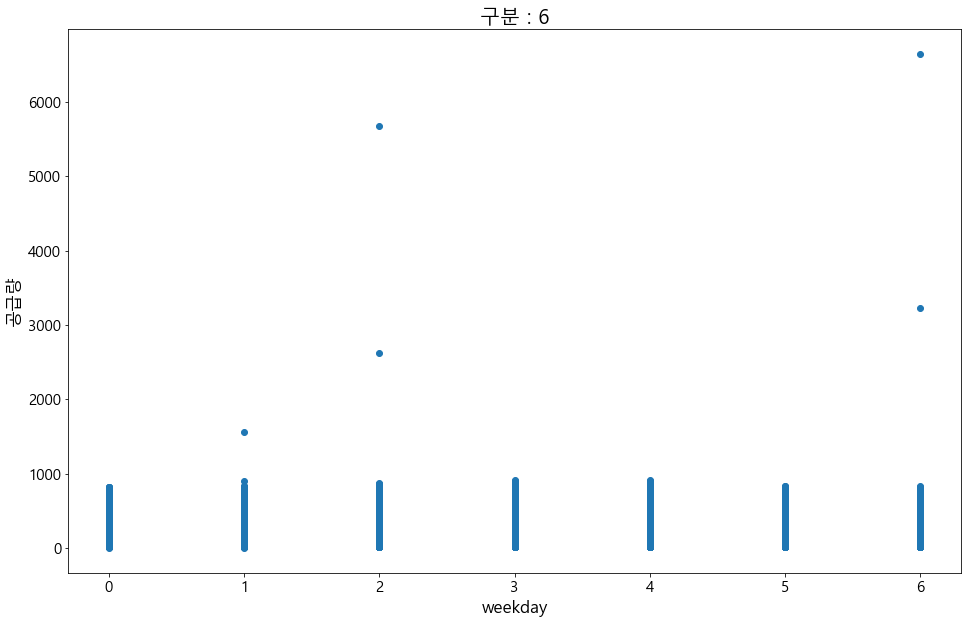

In [39]:
df_list = [df0, df1, df2, df3, df4, df5, df6]
for i, div in tqdm(enumerate(df_list)):
    plt.figure(figsize=(16,10))
    plt.title(f'구분 : {i}', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.xlabel('weekday', fontdict={'size':17})
    plt.yticks(fontsize=15)
    plt.ylabel('공급량', fontdict={'size':17})
    plt.scatter(x='weekday', y='공급량', data=div)

## 시간별

100%|██████████| 7/7 [00:00<00:00,  8.69it/s]


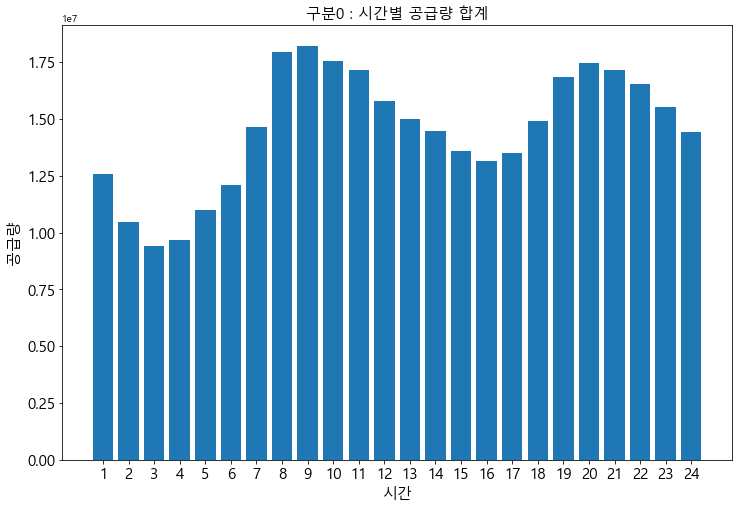

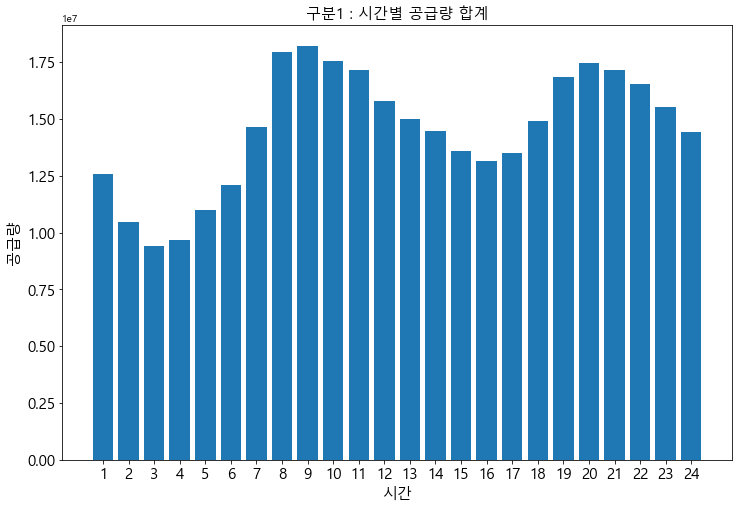

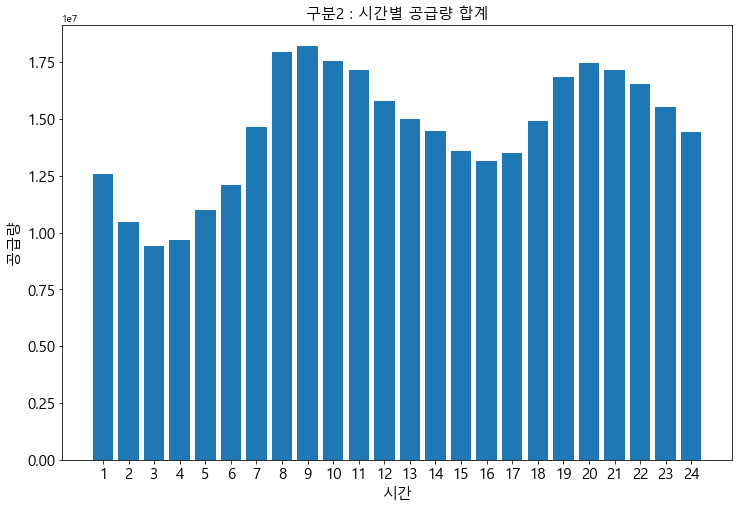

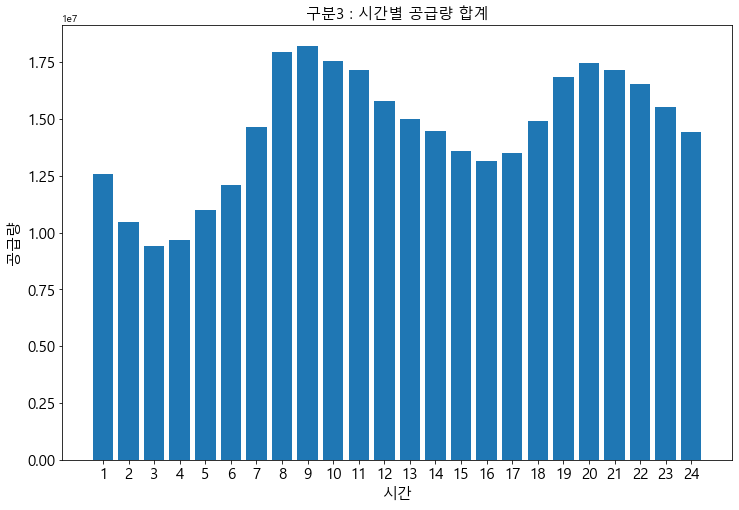

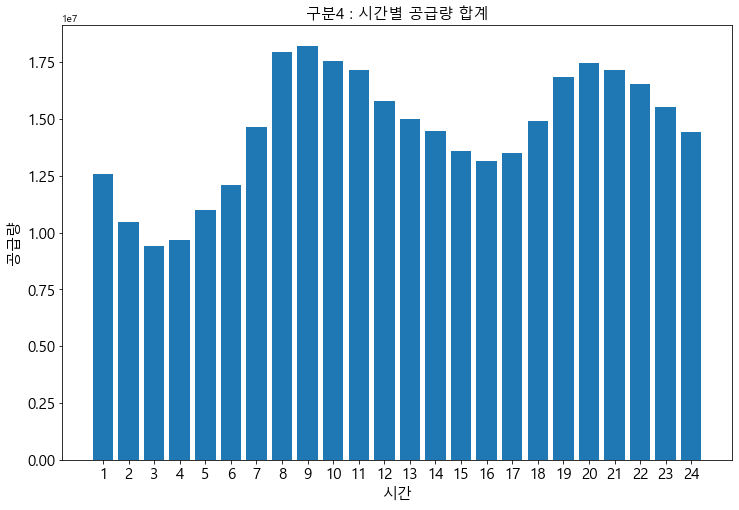

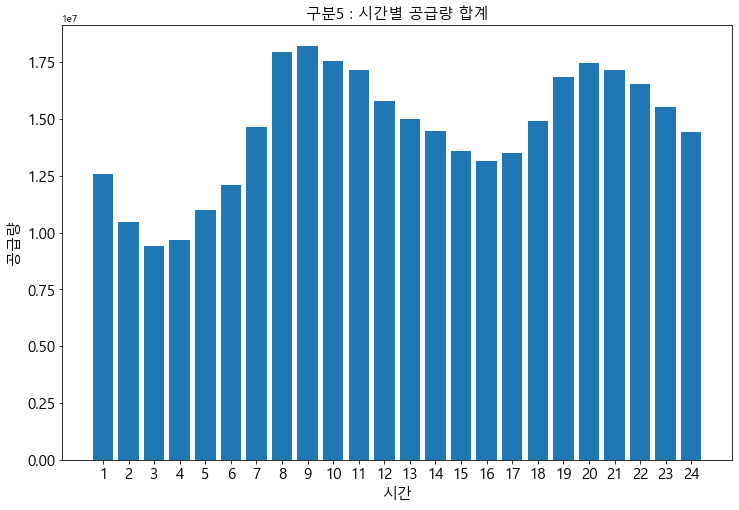

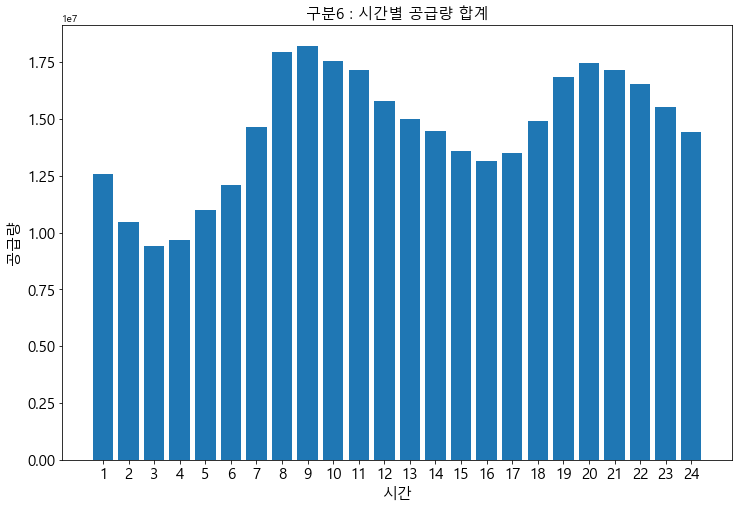

In [56]:
for div in tqdm(df['구분'].unique()):
    tmp = df[df['구분'] == div].reset_index(drop=True)
    plt.figure(figsize=(12,8))
    plt.xticks(range(1,25) ,fontsize=15)
    plt.xlabel('시간', fontdict={'size':15})
    plt.yticks(fontsize=15)
    plt.ylabel('공급량', fontdict={'size':15})
    plt.title(f"구분{div} : 시간별 공급량 합계", fontdict={'size':15})
    plt.bar(range(1,25), df.groupby(['시간']).sum()['공급량'])

# 결측치 처리된 데이터 불러오기

In [42]:
df2 = pd.read_csv('../04_가스_기온_합치기/2013-2018년_가스공급량_기온_습도_기압02.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365308 entries, 0 to 365307
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   연월일      365308 non-null  object 
 1   year     365308 non-null  int64  
 2   month    365308 non-null  int64  
 3   day      365308 non-null  int64  
 4   weekday  365308 non-null  int64  
 5   시간       365308 non-null  int64  
 6   구분       365308 non-null  int64  
 7   공급량      365308 non-null  float64
 8   기온       365308 non-null  float64
 9   습도       365308 non-null  float64
 10  기압       365308 non-null  float64
dtypes: float64(4), int64(6), object(1)
memory usage: 30.7+ MB


## 일자별 공급량

### 월별 공급량

100%|██████████| 7/7 [00:00<00:00, 12.65it/s]


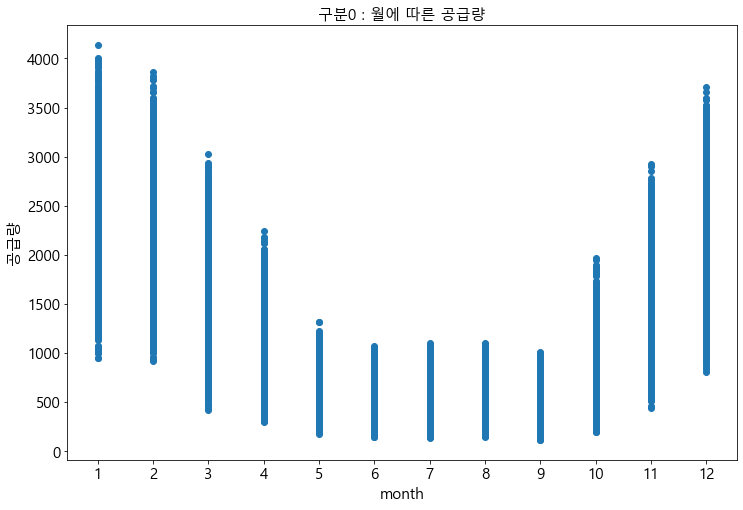

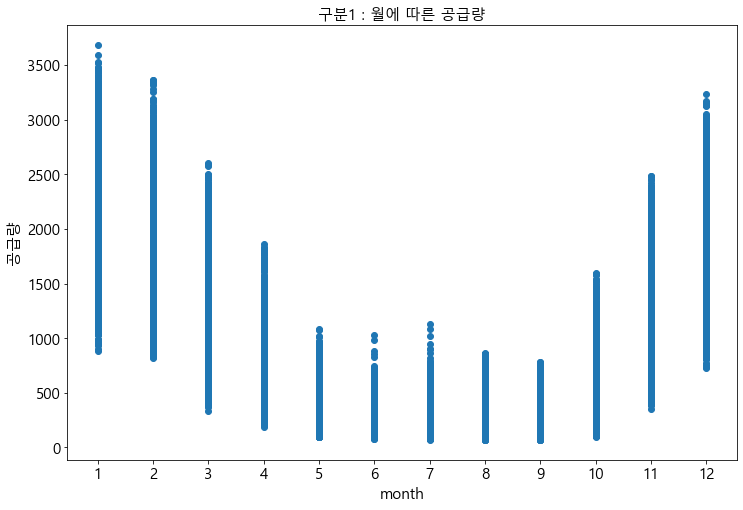

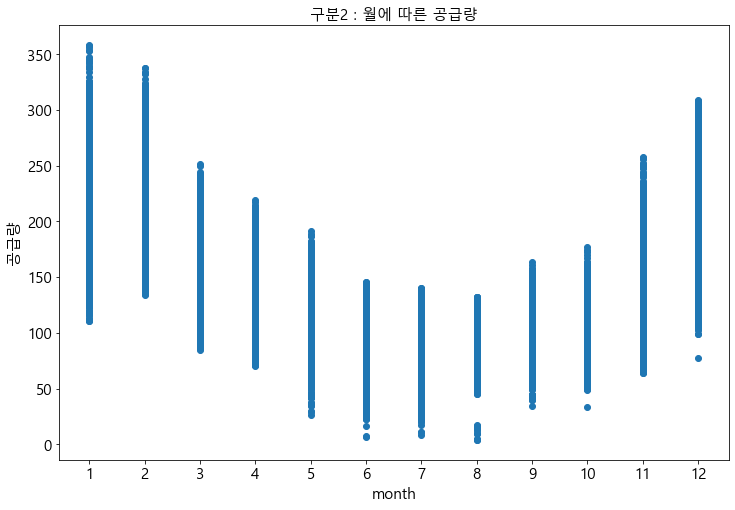

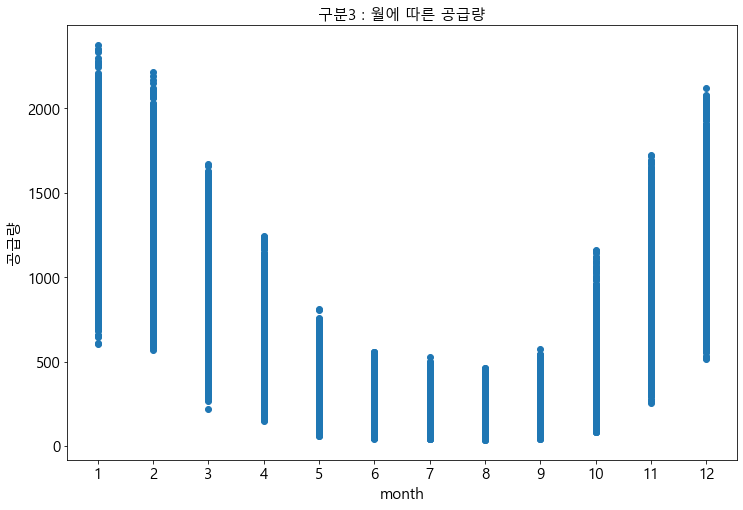

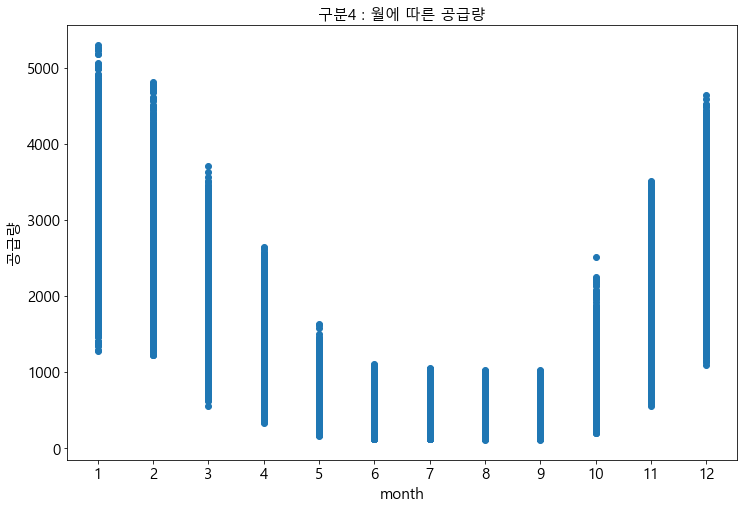

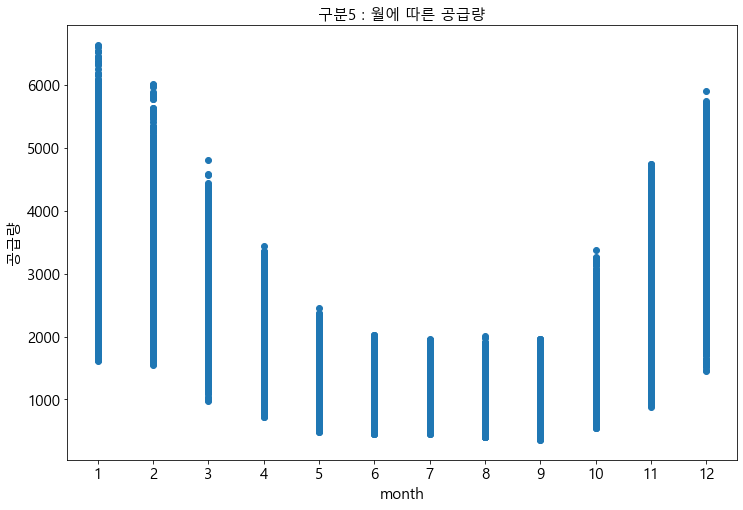

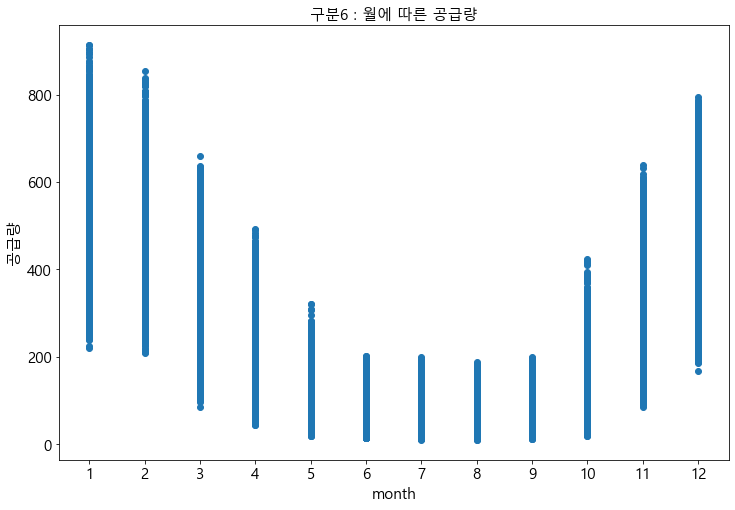

In [43]:
for div in tqdm(df2['구분'].unique()):
    tmp = df2[df2['구분'] == div].reset_index(drop=True)
    plt.figure(figsize=(12,8))
    plt.xticks(range(1,13) ,fontsize=15)
    plt.xlabel('month', fontdict={'size':15})
    plt.yticks(fontsize=15)
    plt.ylabel('공급량', fontdict={'size':15})
    plt.title(f"구분{div} : 월에 따른 공급량", fontdict={'size':15})
    plt.scatter(x='month', y='공급량', data=tmp)

In [44]:
n = df2[(df2['구분']==2) & (df2['month']==8) & (df2['공급량'] < 40)]
len(n)

14

In [45]:
n

,연월일,year,month,day,weekday,시간,구분,공급량,기온,습도,기압
219668,2016-08-10,2016,8,10,2,16,2,16.578,33.5,47.0,999.2
219675,2016-08-10,2016,8,10,2,17,2,14.978,32.7,52.0,999.2
219682,2016-08-10,2016,8,10,2,18,2,13.378,31.6,55.0,999.0
219689,2016-08-10,2016,8,10,2,19,2,14.978,31.1,56.0,999.2
219696,2016-08-10,2016,8,10,2,20,2,17.378,29.7,61.0,999.8
219703,2016-08-10,2016,8,10,2,21,2,15.778,28.8,67.0,1000.4
219710,2016-08-10,2016,8,10,2,22,2,13.378,28.2,70.0,1000.4
219717,2016-08-10,2016,8,10,2,23,2,9.378,27.7,74.0,1000.4
219724,2016-08-10,2016,8,10,2,24,2,4.578,27.4,75.0,1000.3
219731,2016-08-11,2016,8,11,3,1,2,3.778,27.3,74.0,1000.1


### 일별 공급량

100%|██████████| 7/7 [00:00<00:00, 16.59it/s]


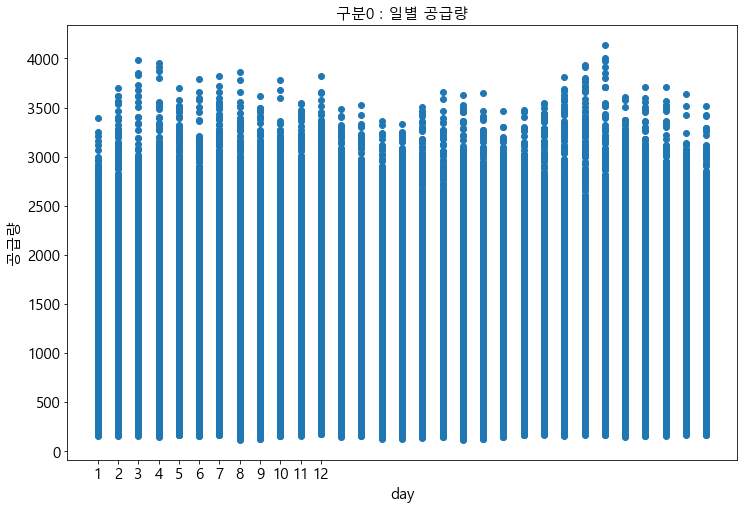

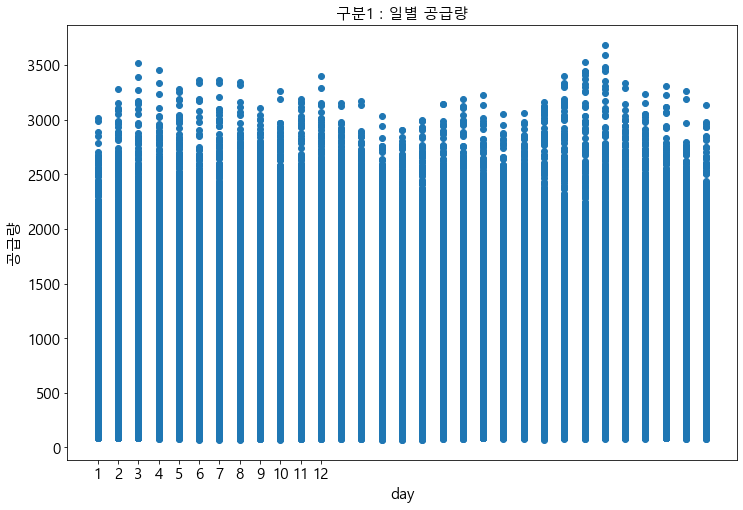

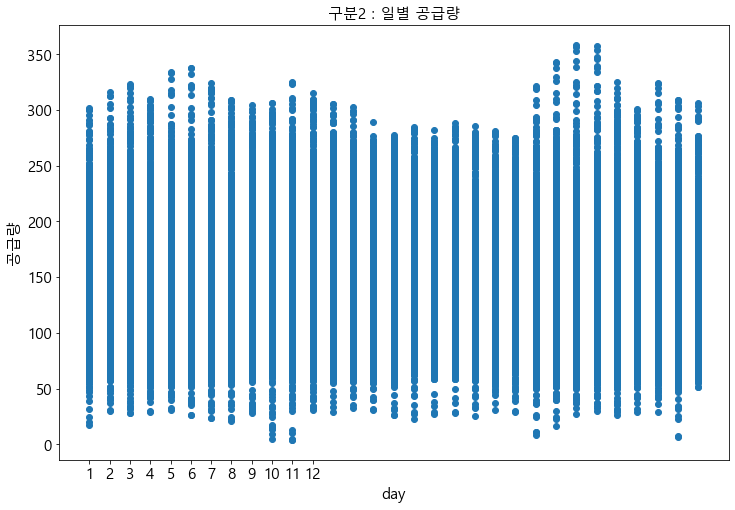

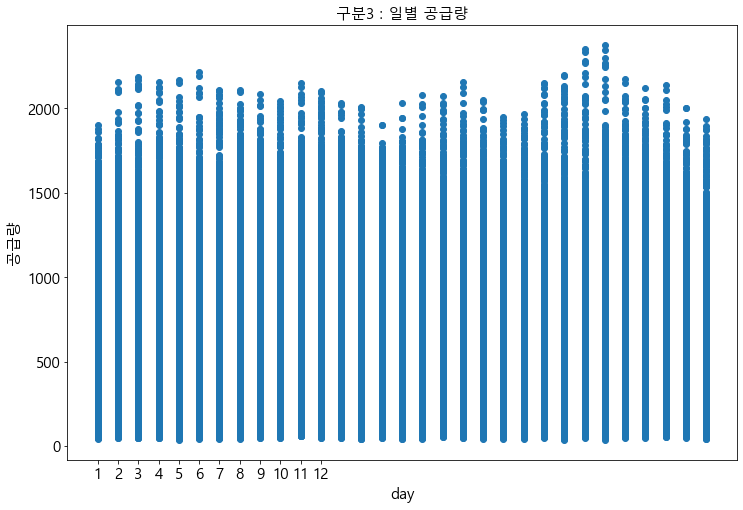

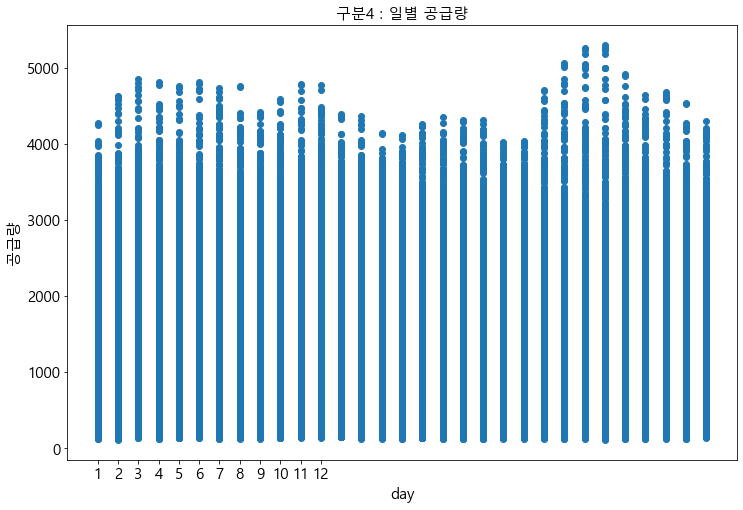

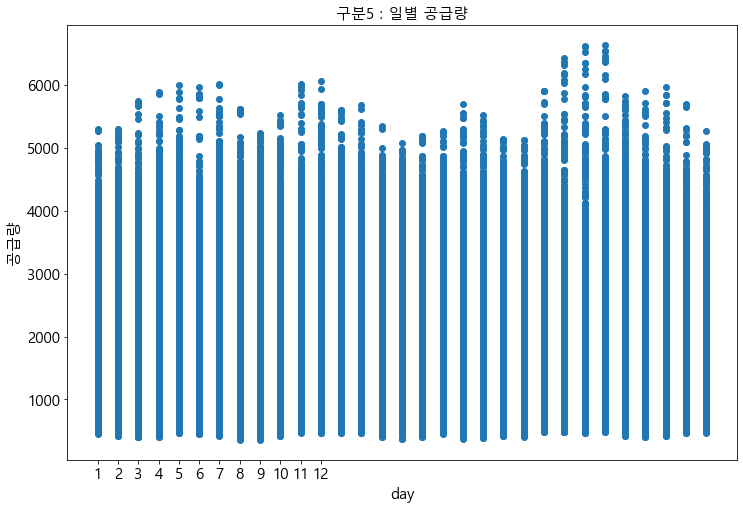

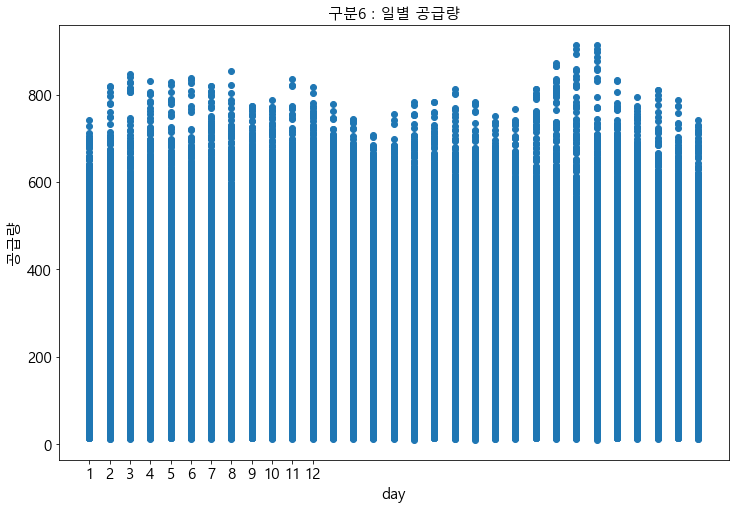

In [47]:
for div in tqdm(df2['구분'].unique()):
    tmp = df2[df2['구분'] == div].reset_index(drop=True)
    plt.figure(figsize=(12,8))
    plt.xticks(range(1,32) ,fontsize=15)
    plt.xlabel('day', fontdict={'size':15})
    plt.yticks(fontsize=15)
    plt.ylabel('공급량', fontdict={'size':15})
    plt.title(f"구분{div} : 일별 공급량", fontdict={'size':15})
    plt.scatter(x='day', y='공급량', data=tmp)

# 음력 데이터 불러오기

In [48]:
lunar = pd.read_csv('../07_결과_출력/2013-2018년_가스공급량_기온_습도_기압02.csv')
lunar.head()

,일시,year,month,day,weekday,시간,구분,공급량,기온,습도,기압,연월일,hour,quarter,음력일시,lunar_year,lunar_month,lunar_day
0,2013-01-01 01,2013,1,1,1,1,0,2497.129,-8.5,57.0,1010.0,2013-01-01,1,1,2012-11-20,2012,11,20
1,2013-01-01 02,2013,1,1,1,2,0,2363.265,-8.4,60.0,1009.4,2013-01-01,2,1,2012-11-20,2012,11,20
2,2013-01-01 03,2013,1,1,1,3,0,2258.505,-8.1,58.0,1009.2,2013-01-01,3,1,2012-11-20,2012,11,20
3,2013-01-01 04,2013,1,1,1,4,0,2243.969,-8.2,58.0,1008.2,2013-01-01,4,1,2012-11-20,2012,11,20
4,2013-01-01 05,2013,1,1,1,5,0,2344.105,-8.2,61.0,1007.3,2013-01-01,5,1,2012-11-20,2012,11,20


## 상관계수

### 양력

<AxesSubplot:>

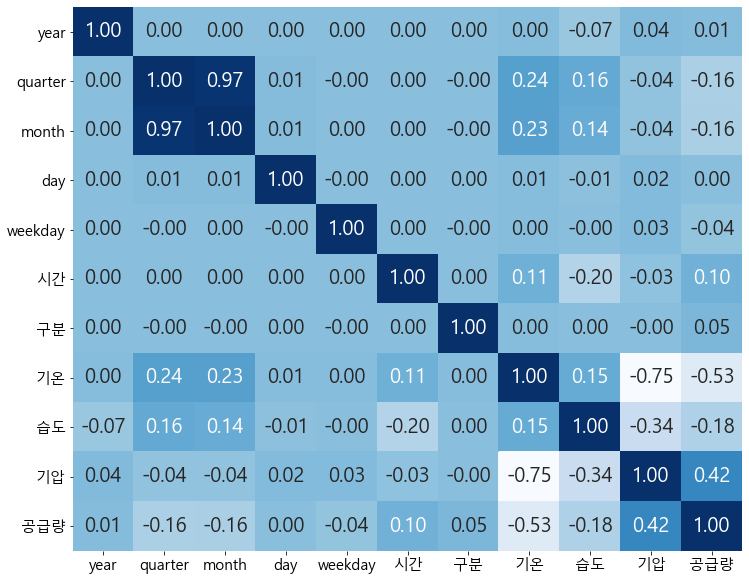

In [49]:
plt.figure(figsize=(12,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.heatmap(lunar[['year', 'quarter', 'month', 'day', 'weekday', '시간', '구분', '기온', '습도', '기압', '공급량']].corr(), cmap='Blues', annot=True, fmt='.2f', cbar=False, annot_kws={"size": 20})

### 음력

<AxesSubplot:>

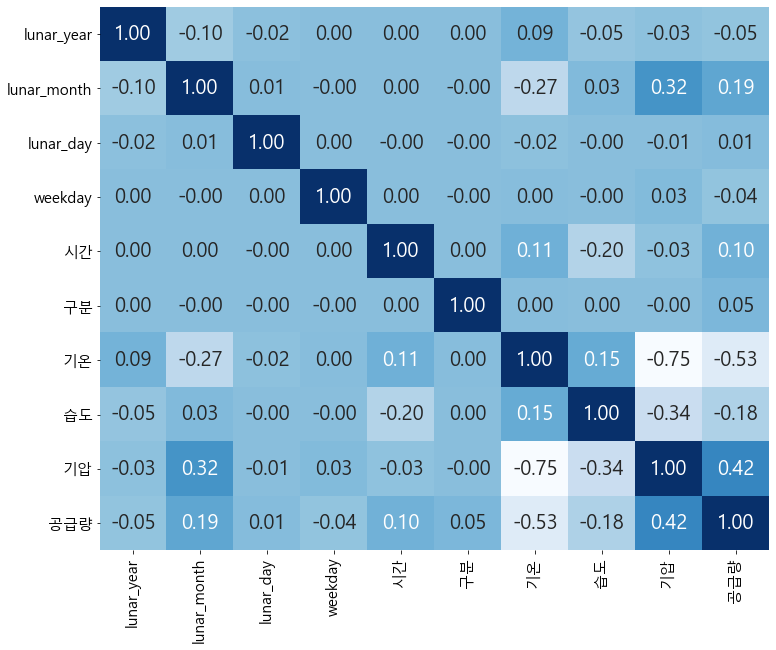

In [51]:
plt.figure(figsize=(12,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.heatmap(lunar[['lunar_year', 'lunar_month', 'lunar_day', 'weekday', '시간', '구분', '기온', '습도', '기압', '공급량']].corr(), cmap='Blues', annot=True, fmt='.2f', cbar=False, annot_kws={"size": 20})

## 일자별 기온

### 연도별

100%|██████████| 7/7 [00:00<00:00, 14.07it/s]


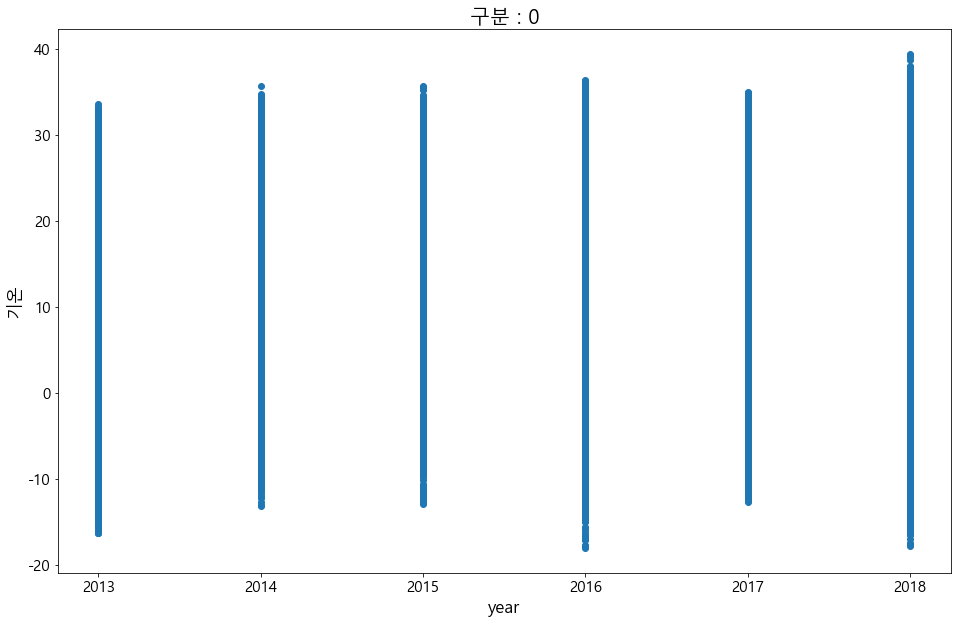

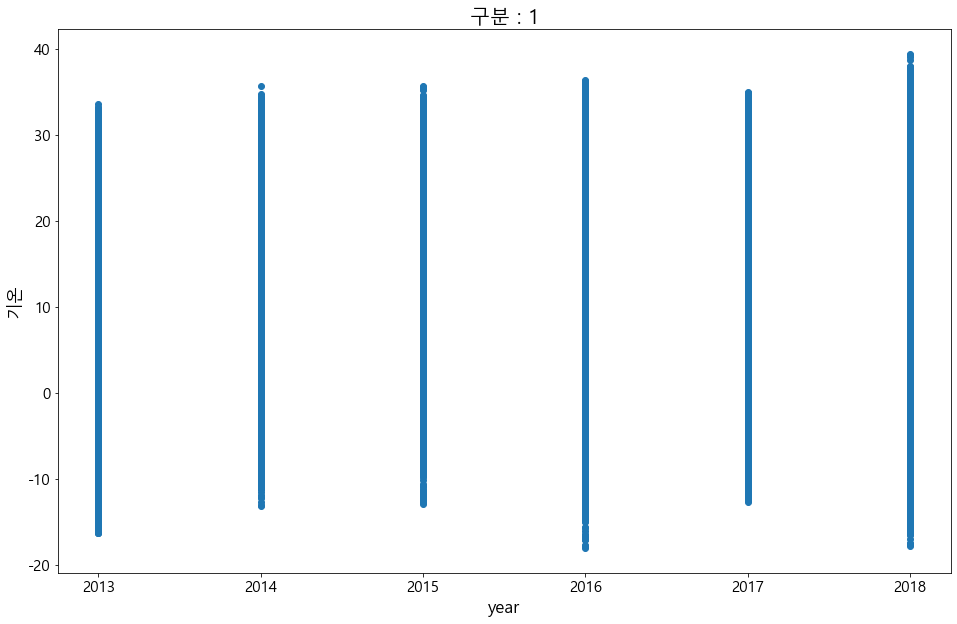

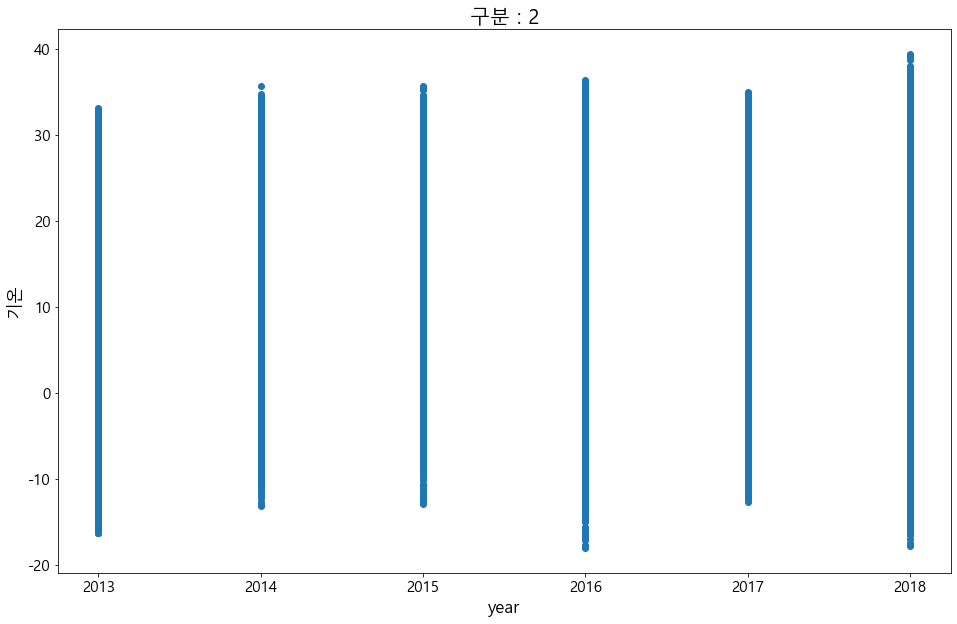

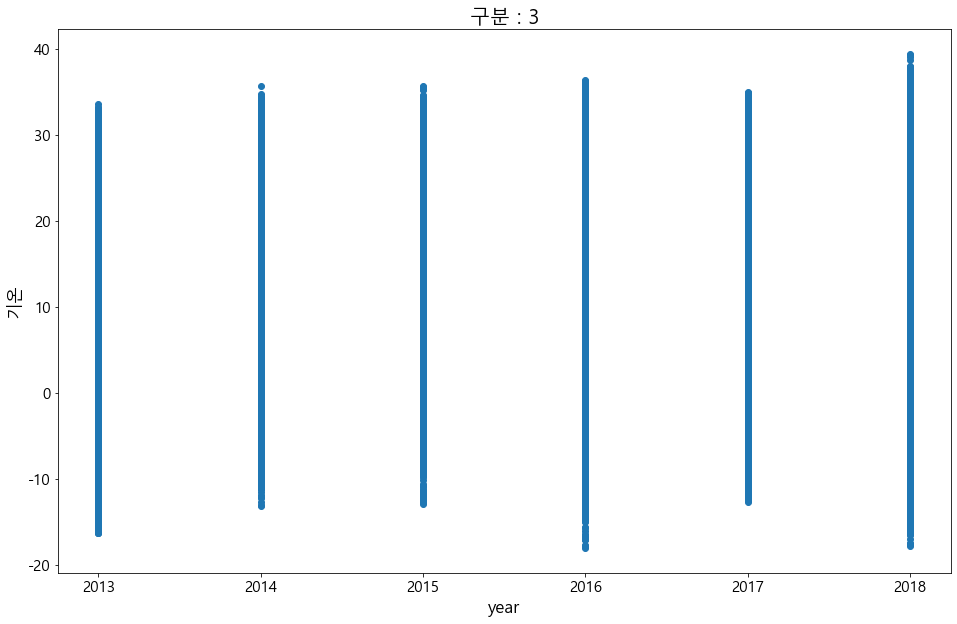

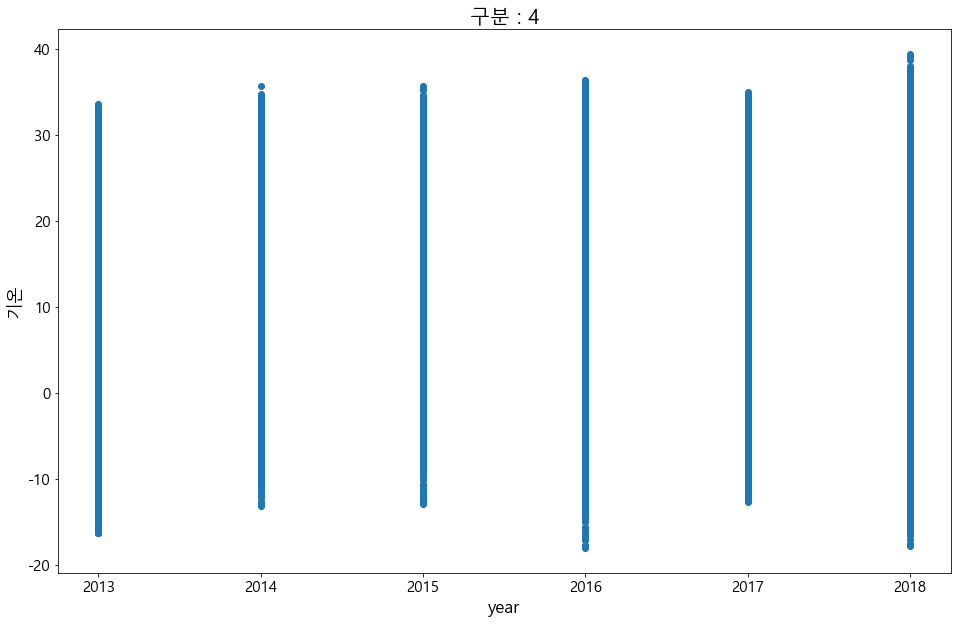

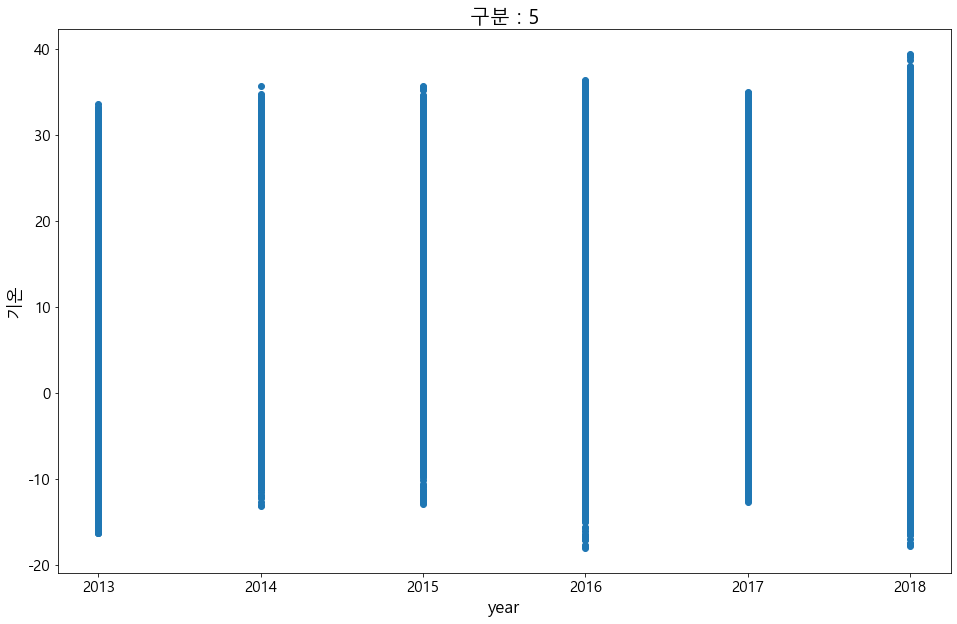

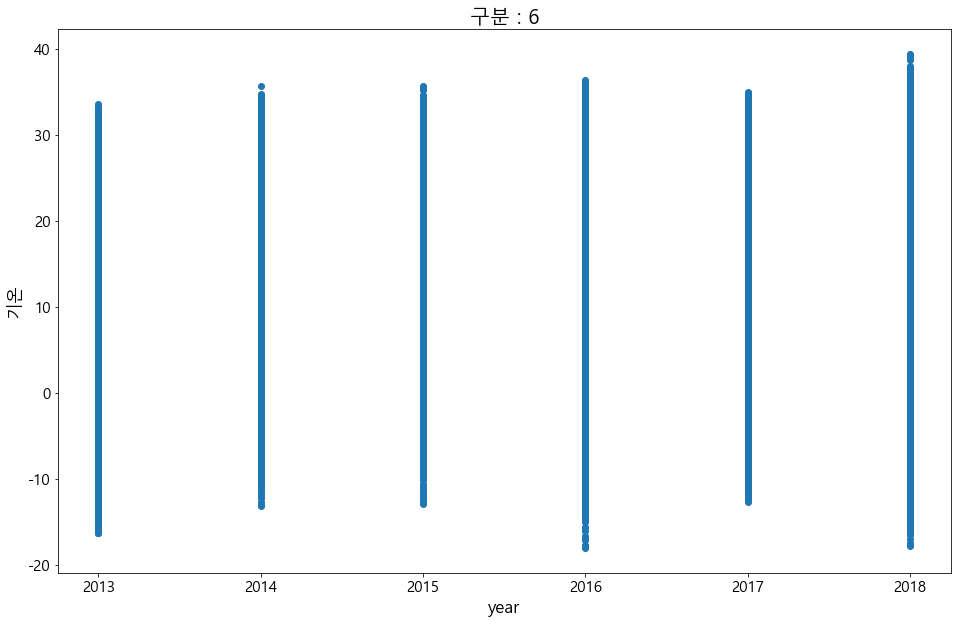

In [52]:
for i in tqdm(range(7)):
    tmp = lunar[lunar['구분']==i].reset_index(drop=True)

    plt.figure(figsize=(16,10))
    plt.title(f'구분 : {i}', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.xlabel('year', fontdict={'size':17})
    plt.yticks(fontsize=15)
    plt.ylabel('기온', fontdict={'size':17})
    plt.scatter(x='year', y='기온', data=tmp)